# Sommaire:


**Objectifs de la mission**


**I) Préparation de l'environnement et importation des données**
 - <a href="#C1">Initialisation des librairies de base et préparation de l'environnement</a>
 - <a href="#C2">Importation des données</a>
 - <a href="#C3">Récupération des informations d'intérêts</a>
 - <a href="#C4"> Création du jeu de données principale</a>

**II) Pré-Analyse du jeu de donnée**
- <a href="#C5"> Analyse des valeurs manquantes et application d'un premier filtre</a>
- <a href="#C6"> Analyse de la répartition empirique des différentes variables</a>
- <a href="#C7"> Analyse de la relation entre les variables</a>
- <a href="#C8"> Prédiction des valeurs manquantes</a>
- <a href="#C9"> Simplification du jeu de données</a>
- <a href="#C10"> Représentation des indicateurs et second filtrage des pays</a>

**III) Création d'un indice de scoring**

**IV) Représentation graphique des indicateurs**

- <a href="#C11">Ajout du code du pays et de la région géographique</a>
- <a href="#C12">Représentations graphiques du score des pays d'intérêts</a>
- <a href="#C13">Représentation des indicateurs par REGION</a>
- <a href="#C14">Evolution dans le temps des indicateurs à l'échelle régionale</a>
- <a href="#C15">Evolution dans le temps des indicateurs : Pays d'intérêts</a>

***


# Objectifs de la mission

Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.
Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :
-	Quels sont les pays avec un fort potentiel de clients pour nos services ?
-	Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
-	Dans quels pays l'entreprise doit-elle opérer en priorité ?


Pour la pré-analyse :
-	Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
-	Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
-	Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
-	Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

***

# I) Préparation de l'environnement et importation des données

### <a name="C1"> Initialisation des librairies de base et préparation de l'environnement</a>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.options.display.float_format = '{:.4f}'.format

### <a name="C2"> Importation des données </a>

In [3]:
Data = pd.read_csv('Data\EdStatsData.csv',sep=',')

In [4]:
# Apercu du jeu de données
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

### <a name="C3"> Récupération des informations d'intérêts</a>

In [5]:
#Récupération de la liste des différents pays
Countries=Data['Country Name'].unique()
print(Countries)

['Arab World' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'European Union' 'Heavily indebted poor countries (HIPC)' 'High income'
 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)' 'Middle income'
 'North America' 'OECD members' 'South Asia' 'Sub-Saharan Africa'
 'Sub-Saharan Africa (excluding high income)' 'Upper middle income'
 'World' 'Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British

In [6]:
# Retrait des valeurs ne correspondant pas à un pays :  
CountriesF = Countries[25:]
print(CountriesF[:10])

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba']


In [7]:
# Récupération de la liste des différentes variables

Indicators = Data['Indicator Name'].unique()

print(Indicators.shape)

(3665,)


In [8]:
# Récupération de la liste des variables d'intérêts 

ID_Indic = [2084,1375,1335,1339,1245,1251,3348,2533,2307,1260,1214,1204,1191,1201]

IndicatorsF = Indicators[ID_Indic]

print(IndicatorsF)

['Personal computers (per 100 people)' 'Internet users (per 100 people)'
 'Gross enrolment ratio, secondary, both sexes (%)'
 'Gross enrolment ratio, tertiary, both sexes (%)'
 'GDP per capita (current US$)'
 'GNI per capita, Atlas method (current US$)'
 'Unemployment, total (% of total labor force)' 'Population, total'
 'Population growth (annual %)'
 'Government expenditure on education as % of GDP (%)'
 'Enrolment in upper secondary education, both sexes (number)'
 'Enrolment in tertiary education, all programmes, both sexes (number)'
 'Enrolment in secondary education, both sexes (number)'
 'Enrolment in tertiary education per 100,000 inhabitants, both sexes']


### <a name="C4"> Création du jeu de données principale</a>

In [9]:
# Création du jeu de données avec les pays et les indicateurs d'intérêts.
dataF=Data[(Data['Country Name'].isin(CountriesF)) & (Data['Indicator Name'].isin(IndicatorsF))].copy()

In [10]:
#Vérification du jeu de données

print(dataF['Indicator Name'].unique())
print('')
print('_'*200)
print('')
print(dataF['Country Name'].unique())

['Enrolment in secondary education, both sexes (number)'
 'Enrolment in tertiary education per 100,000 inhabitants, both sexes'
 'Enrolment in tertiary education, all programmes, both sexes (number)'
 'Enrolment in upper secondary education, both sexes (number)'
 'GDP per capita (current US$)'
 'GNI per capita, Atlas method (current US$)'
 'Government expenditure on education as % of GDP (%)'
 'Gross enrolment ratio, secondary, both sexes (%)'
 'Gross enrolment ratio, tertiary, both sexes (%)'
 'Internet users (per 100 people)' 'Personal computers (per 100 people)'
 'Population growth (annual %)' 'Population, total'
 'Unemployment, total (% of total labor force)']

________________________________________________________________________________________________________________________________________________________________________________________________________

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 

In [11]:
#Retrait des années qui datent de plus de 10 ans. Au delà de cette date, nous pouvons considérer que les données des indicateurs sont obsolètes. 
ColumnsToKeep=["Country Name","Country Code","Indicator Name","Indicator Code","2012","2013","2014","2015","2016"]
dataF = dataF[ColumnsToKeep]

In [12]:
#Apercu du jeu de données
dataF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3038 entries, 92816 to 886613
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3038 non-null   object 
 1   Country Code    3038 non-null   object 
 2   Indicator Name  3038 non-null   object 
 3   Indicator Code  3038 non-null   object 
 4   2012            2172 non-null   float64
 5   2013            2117 non-null   float64
 6   2014            2007 non-null   float64
 7   2015            1693 non-null   float64
 8   2016            1208 non-null   float64
dtypes: float64(5), object(4)
memory usage: 237.3+ KB


In [13]:
# Création d'une variable Value qui prend les valeurs de 2016 initialement. 
dataF['Value'] = dataF['2016']

# Si la valeur de 2016 est absente (nan) :
# Boucle qui attribue à la colonne 'Value' la dernière valeur connue de la ligne entre 2012 et 2016. 

for n in range(7,3,-1): 
    column=dataF.columns.values[n]
    print(column) # Sécurité : print du nom de la colonne pour vérifier l'incrémentation. 
    dataF['Value'] = dataF['Value'].fillna(dataF[column])
    
    
# Retrait des variables désormais inutiles (années), pour ne garder que 'Value', la dernière valeur connue

dataF=dataF.drop(columns=['2012','2013','2014', '2015','2016'])

2015
2014
2013
2012


In [14]:
# Reformattage des données afin d'avoir chaque pays en ligne, et chacun des indicateurs comme variable. 

DataPivot = dataF.pivot_table(index='Country Name', columns='Indicator Name', values='Value').reset_index()

DataPivot

Indicator Name           Country Name  \
0                         Afghanistan   
1                             Albania   
2                             Algeria   
3                      American Samoa   
4                             Andorra   
..                                ...   
212             Virgin Islands (U.S.)   
213                West Bank and Gaza   
214                       Yemen, Rep.   
215                            Zambia   
216                          Zimbabwe   

Indicator Name  Enrolment in secondary education, both sexes (number)  \
0                                                    2698816.0000       
1                                                     315079.0000       
2                                                             NaN       
3                                                             NaN       
4                                                       4395.0000       
..                                                            ...       
212                                                           NaN       
213                                                   721414.0000       
214                                                  1768102.0000       
215                                                           NaN       
216                                                   957461.0000       

Indicator Name  Enrolment in tertiary education per 100,000 inhabitants, both sexes  \
0                                                        831.1562                     
1                                                       6015.1729                     
2                                                       3198.9194                     
3                                                             NaN                     
4                                                             NaN                     
..                                                            ...                     
212                                                           NaN                     
213                                                     4710.0884                     
214                                                           NaN                     
215                                                           NaN                     
216                                                      631.7252                     

Indicator Name  Enrolment in tertiary education, all programmes, both sexes (number)  \
0                                                     262874.0000                      
1                                                     160527.0000                      
2                                                    1289474.0000                      
3                                                             NaN                      
4                                                        501.0000                      
..                                                            ...                      
212                                                           NaN                      
213                                                   221018.0000                      
214                                                           NaN                      
215                                                    56680.0000                      
216                                                   135575.0000                      

Indicator Name  Enrolment in upper secondary education, both sexes (number)  \
0                                                     968769.0000             
1                                                     151937.0000             
2                                                             NaN             
3                                                             NaN             
4                                                       1288.0000             
..                                                    

# II) Pré-Analyse du jeu de donnée

### <a name="C5"> Analyse des valeurs manquantes et applciation d'un premier filtre</a>

In [15]:
# Résumé des données reformaté : Apercu du nombre de lignes ( pays), liste des variables ainsi que le nombre de valeurs pour chacune des variables.
# On peut donc aisément déterminer le nombre de valeur manquante. 

DataPivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 14 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country Name                                                          217 non-null    object 
 1   Enrolment in secondary education, both sexes (number)                 178 non-null    float64
 2   Enrolment in tertiary education per 100,000 inhabitants, both sexes   148 non-null    float64
 3   Enrolment in tertiary education, all programmes, both sexes (number)  163 non-null    float64
 4   Enrolment in upper secondary education, both sexes (number)           172 non-null    float64
 5   GDP per capita (current US$)                                          200 non-null    float64
 6   GNI per capita, Atlas method (current US$)                            189 non-null    float64
 7  

In [16]:
# Certains variables sont redondantes. Maintenant que la liste des pays est établi, on peut garder les variables avec le plus de données dispo

ColumnsToKeep=["Country Name",
               "Enrolment in secondary education, both sexes (number)",
               "Enrolment in tertiary education, all programmes, both sexes (number)",
               "GDP per capita (current US$)",
               "Government expenditure on education as % of GDP (%)",
               "Internet users (per 100 people)",
               "Population growth (annual %)",
               "Population, total",
               "Unemployment, total (% of total labor force)",
               ]

DataPivot = DataPivot[ColumnsToKeep].copy()

In [17]:
DataPivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 9 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country Name                                                          217 non-null    object 
 1   Enrolment in secondary education, both sexes (number)                 178 non-null    float64
 2   Enrolment in tertiary education, all programmes, both sexes (number)  163 non-null    float64
 3   GDP per capita (current US$)                                          200 non-null    float64
 4   Government expenditure on education as % of GDP (%)                   141 non-null    float64
 5   Internet users (per 100 people)                                       203 non-null    float64
 6   Population growth (annual %)                                          214 non-null    float64
 7   

In [18]:
DataPivot.isna().sum()

Indicator Name
Country Name                                                             0
Enrolment in secondary education, both sexes (number)                   39
Enrolment in tertiary education, all programmes, both sexes (number)    54
GDP per capita (current US$)                                            17
Government expenditure on education as % of GDP (%)                     76
Internet users (per 100 people)                                         14
Population growth (annual %)                                             3
Population, total                                                        3
Unemployment, total (% of total labor force)                            31
dtype: int64

<AxesSubplot:>

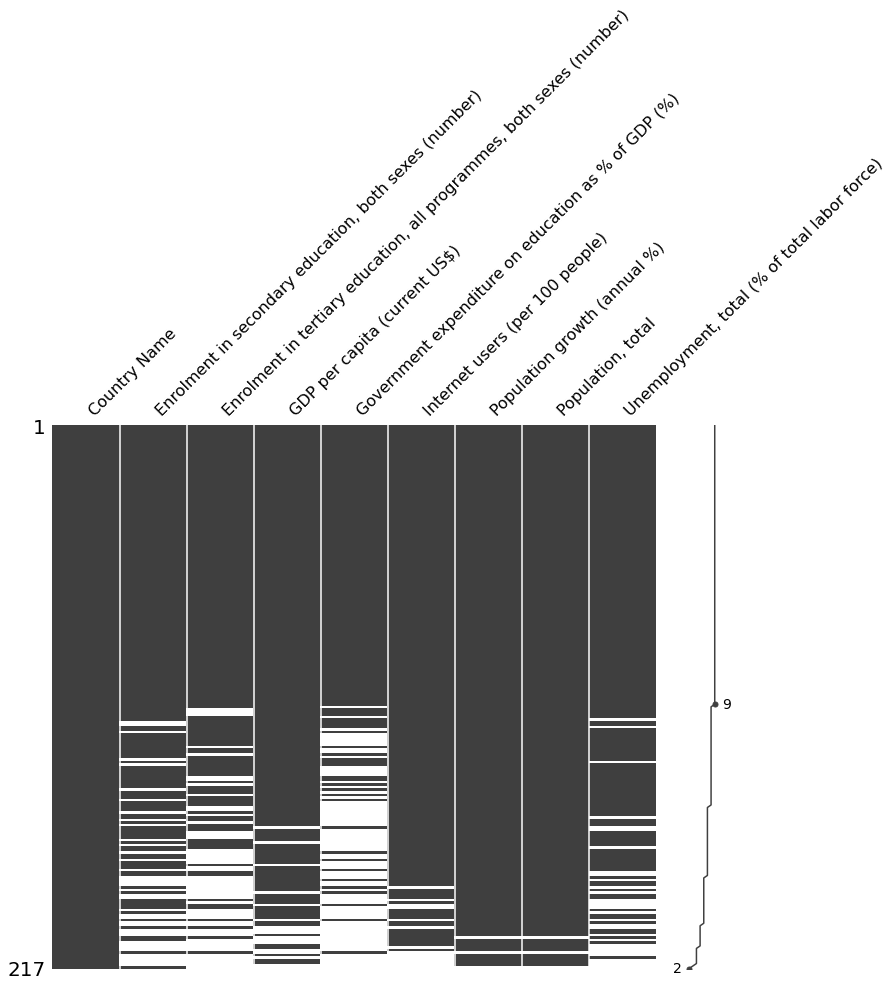

In [19]:
# Visualisation des valeurs manquantes par la librairie Missingno
import missingno as msno



%matplotlib inline
msno.matrix(DataPivot, filter='top', sort='descending',figsize=(12,10))

In [20]:
# Retrait 

# Liste des pays qui vont être retirés (moins de 6 valeurs connues)
DataPivot.loc[~DataPivot.index.isin(DataPivot.dropna(thresh=6).index),  'Country Name']


3                 American Samoa
27        British Virgin Islands
36                Cayman Islands
39               Channel Islands
61                       Eritrea
64                 Faroe Islands
68              French Polynesia
74                     Gibraltar
76                     Greenland
93                   Isle of Man
101                     Kiribati
104                       Kosovo
112                        Libya
137                        Nauru
140                New Caledonia
145     Northern Mariana Islands
171    Sint Maarten (Dutch part)
182     St. Martin (French part)
Name: Country Name, dtype: object

In [21]:
# retrait des payes avec 3 valeurs manquantes ou plus. 
DataPivot.dropna(thresh=6,inplace=True)
DataPivot.reset_index(drop=True, inplace=True)

In [22]:
# Aperçu des données filtrées :
DataPivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country Name                                                          199 non-null    object 
 1   Enrolment in secondary education, both sexes (number)                 173 non-null    float64
 2   Enrolment in tertiary education, all programmes, both sexes (number)  160 non-null    float64
 3   GDP per capita (current US$)                                          193 non-null    float64
 4   Government expenditure on education as % of GDP (%)                   140 non-null    float64
 5   Internet users (per 100 people)                                       194 non-null    float64
 6   Population growth (annual %)                                          199 non-null    float64
 7   

### <a name="C6"> Analyse de la répartition empirique des différentes variables</a>

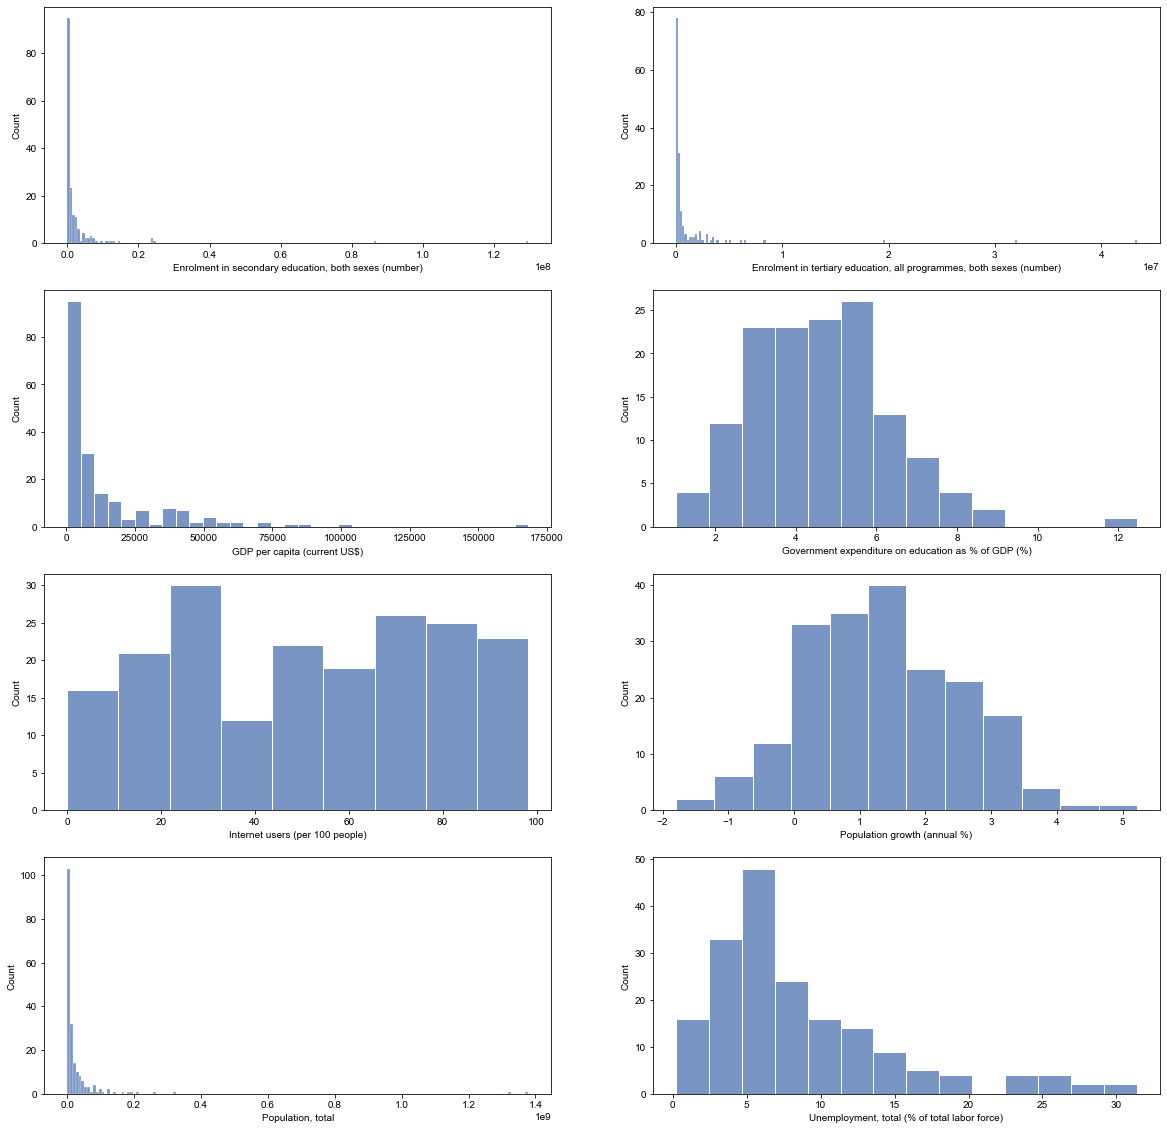

In [23]:
# Représentation des histogrammes pour chacune des variables. 
plt.rcParams["figure.figsize"] = (20,20)
fig, axes = plt.subplots(4,2)

sns.set(font_scale=1.25)
sns.histplot(ax=axes[0,0],data=DataPivot, x="Enrolment in secondary education, both sexes (number)")
sns.histplot(ax=axes[0,1],data=DataPivot, x="Enrolment in tertiary education, all programmes, both sexes (number)")
sns.histplot(ax=axes[1,0],data=DataPivot, x="GDP per capita (current US$)")
sns.histplot(ax=axes[1,1],data=DataPivot, x="Government expenditure on education as % of GDP (%)")
sns.histplot(ax=axes[2,0],data=DataPivot, x="Internet users (per 100 people)")
sns.histplot(ax=axes[2,1],data=DataPivot, x="Population growth (annual %)")
sns.histplot(ax=axes[3,0],data=DataPivot, x="Population, total")
sns.histplot(ax=axes[3,1],data=DataPivot, x="Unemployment, total (% of total labor force)")


#fig.tight_layout()

plt.show()

In [24]:
# Transformation des données en log (naturel, népérien) pour s'approcher d'une distribution suivant une loi normal.

DataPivot["Enrolment in secondary education, both sexes (number)"] =np.log(DataPivot["Enrolment in secondary education, both sexes (number)"])
DataPivot["Enrolment in tertiary education, all programmes, both sexes (number)"] =np.log(DataPivot["Enrolment in tertiary education, all programmes, both sexes (number)"])
DataPivot["GDP per capita (current US$)"] =np.log(DataPivot["GDP per capita (current US$)"])
DataPivot["Population, total"] =np.log(DataPivot["Population, total"])




DataPivot.rename(columns={"Enrolment in secondary education, both sexes (number)" : "log(Enrolment in secondary education (number))",
                           "Enrolment in tertiary education, all programmes, both sexes (number)" : "log(Enrolment in tertiary education (number))",
                           "GDP per capita (current US$)" : "log(GDP per capita (current US$))",
                           "Population, total": "log(Population, total)"
                           }, inplace=True)


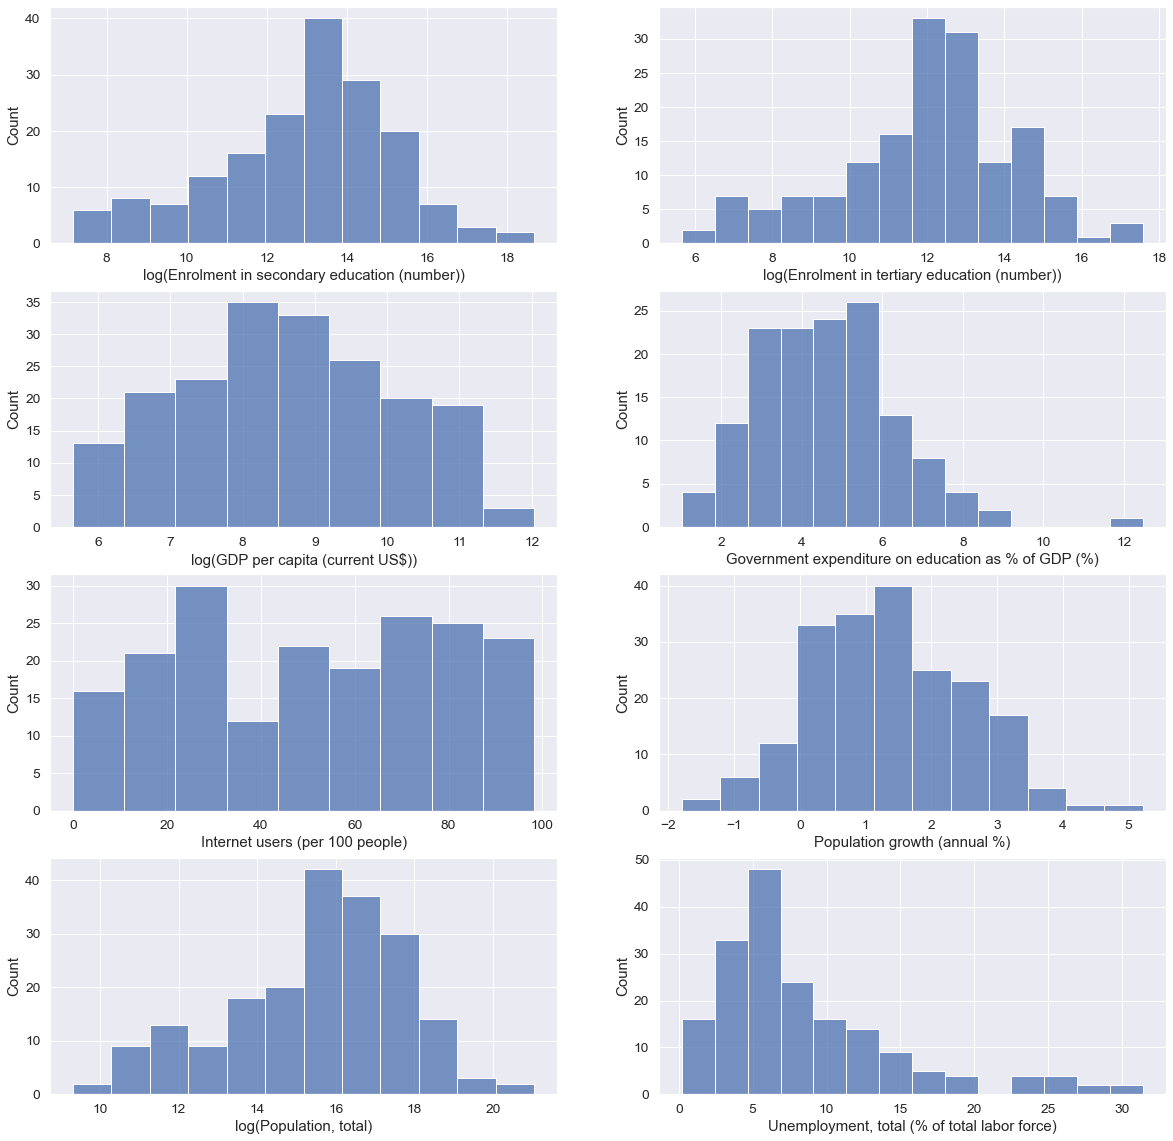

In [25]:
# Représentation des histogrammes pour chacune des variables après transformation. 

plt.rcParams["figure.figsize"] = (20,20)
fig, axes = plt.subplots(4,2)

sns.set(font_scale=1.25)
sns.histplot(ax=axes[0,0],data=DataPivot, x="log(Enrolment in secondary education (number))")
sns.histplot(ax=axes[0,1],data=DataPivot, x="log(Enrolment in tertiary education (number))")
sns.histplot(ax=axes[1,0],data=DataPivot, x="log(GDP per capita (current US$))")
sns.histplot(ax=axes[1,1],data=DataPivot, x="Government expenditure on education as % of GDP (%)")
sns.histplot(ax=axes[2,0],data=DataPivot, x="Internet users (per 100 people)")
sns.histplot(ax=axes[2,1],data=DataPivot, x="Population growth (annual %)")
sns.histplot(ax=axes[3,0],data=DataPivot, x="log(Population, total)")
sns.histplot(ax=axes[3,1],data=DataPivot, x="Unemployment, total (% of total labor force)")


#fig.tight_layout()

plt.show()

### <a name="C7"> Analyse de la relation entre les variables</a>

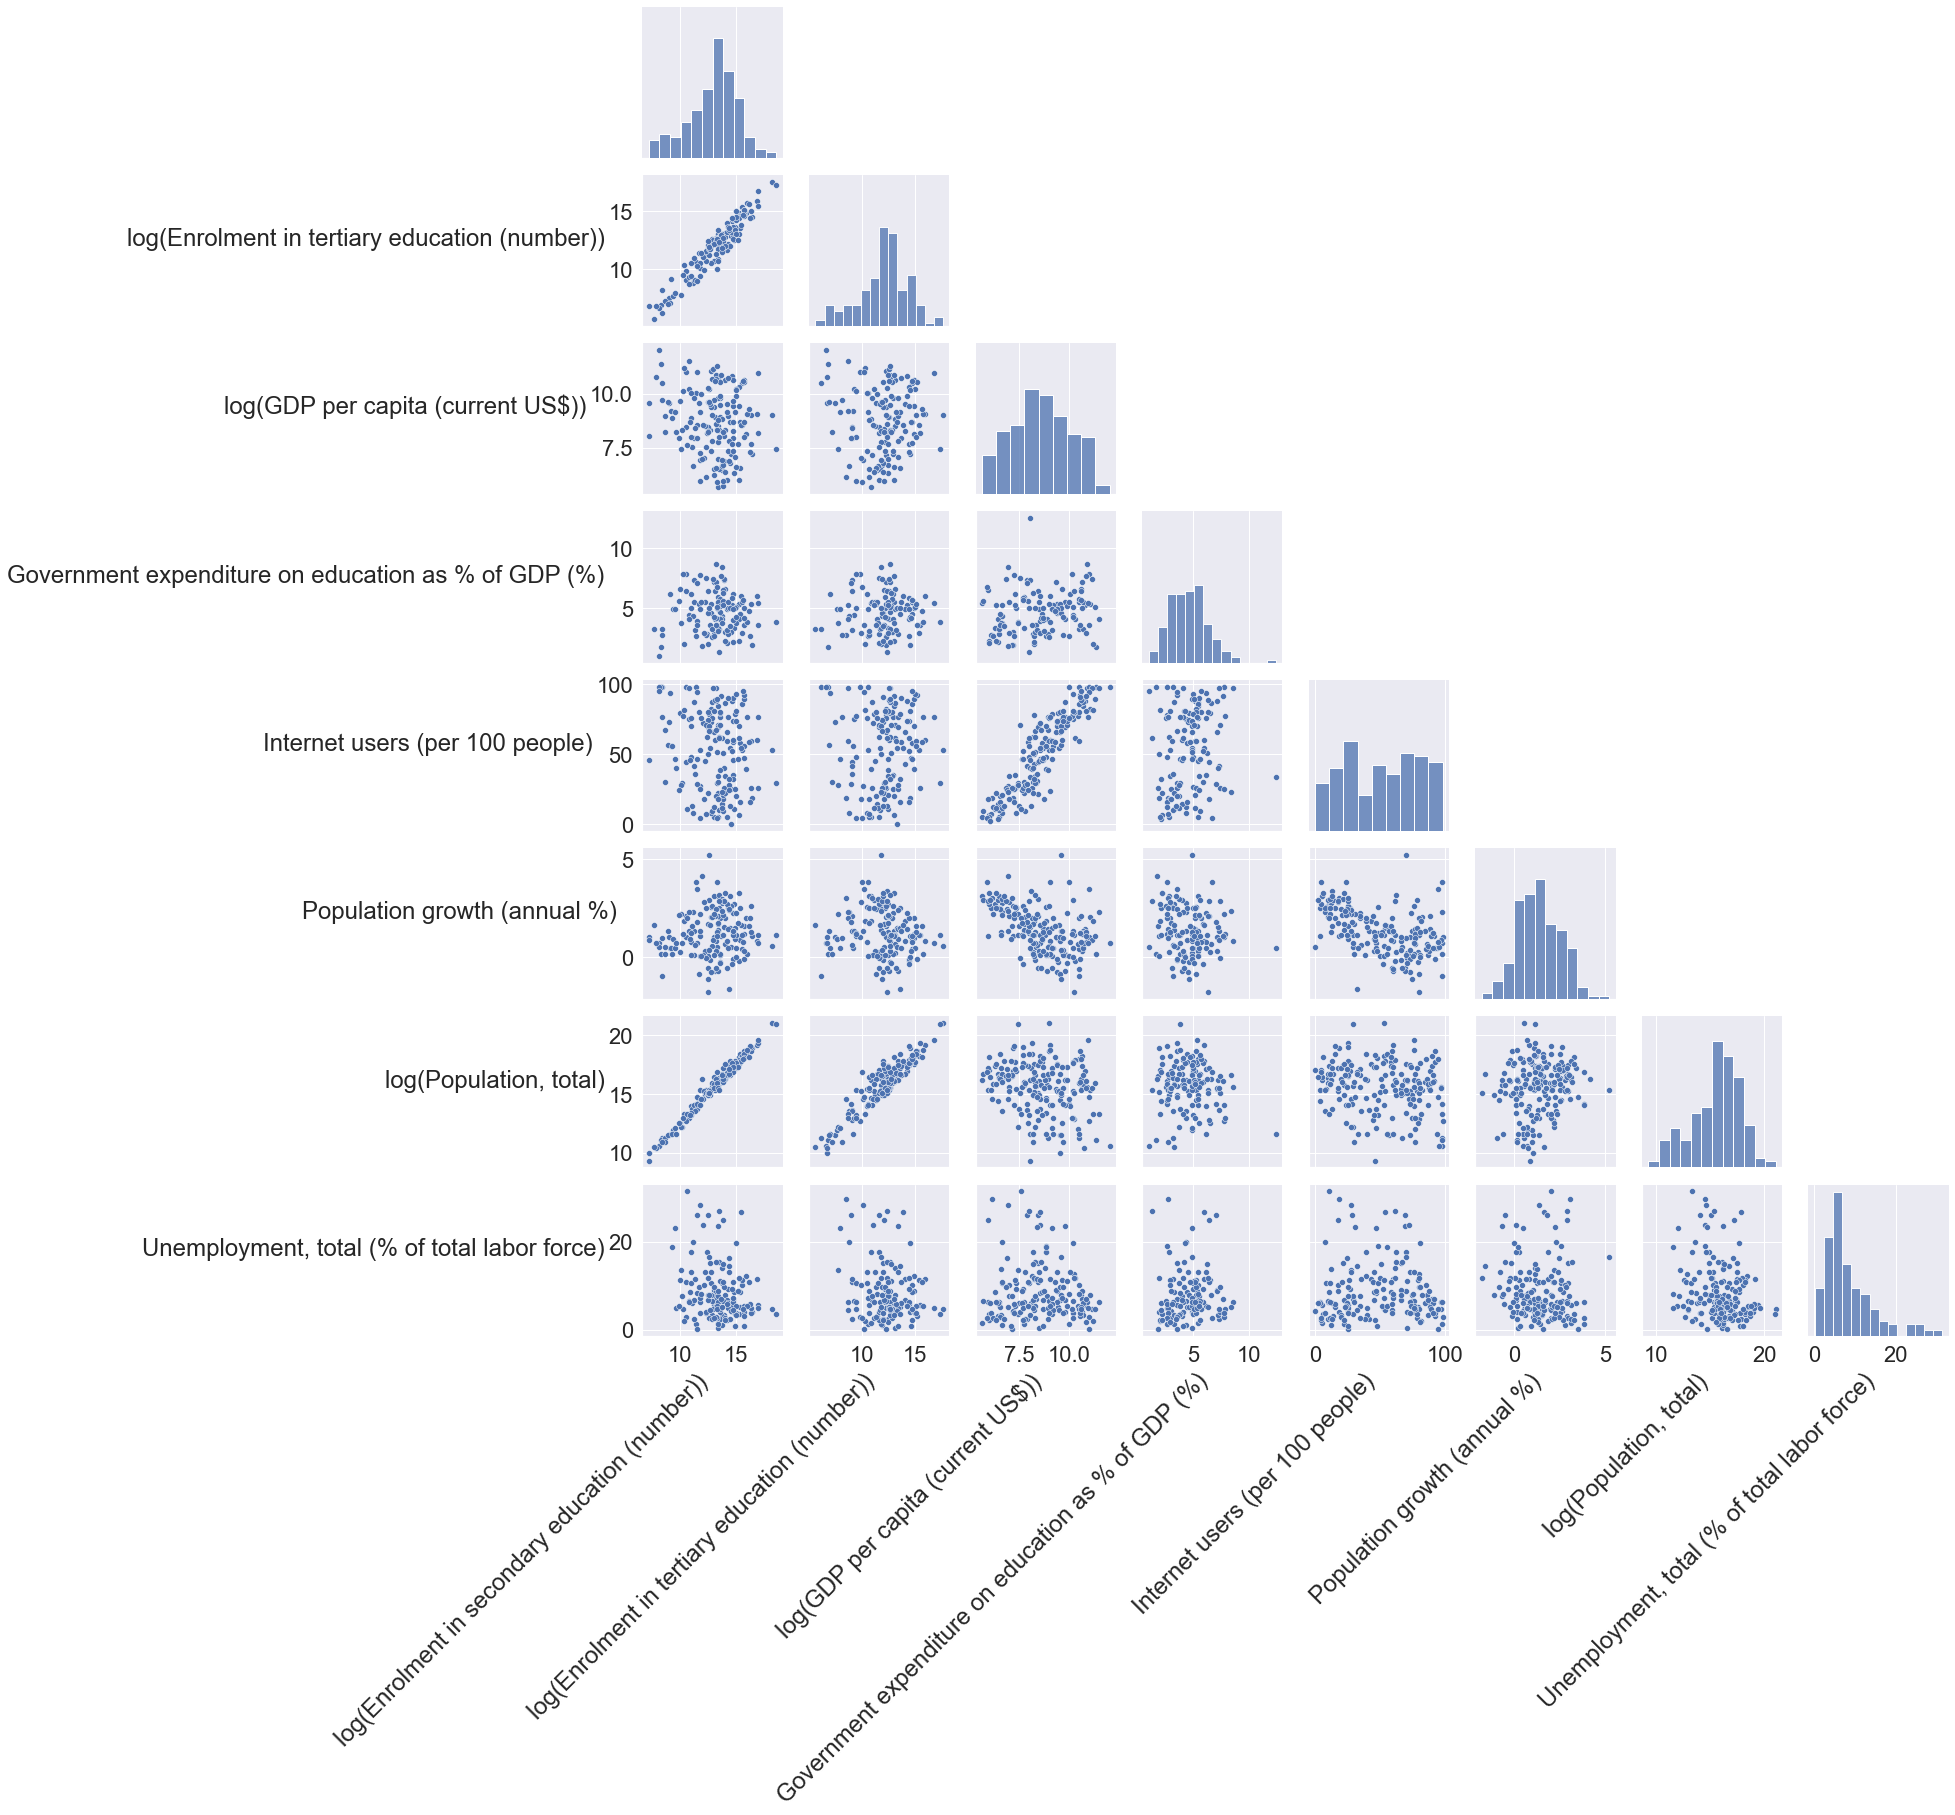

In [26]:
# Pairplot afin d'avoir un apercu de la relation entre les variables. 

sns.set(font_scale=2)

g = sns.pairplot(DataPivot[DataPivot.columns.drop(['Country Name'])], corner=True)

g.tight_layout()

for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 45)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
        # set x labels alignment
        ax.xaxis.get_label().set_horizontalalignment('right')

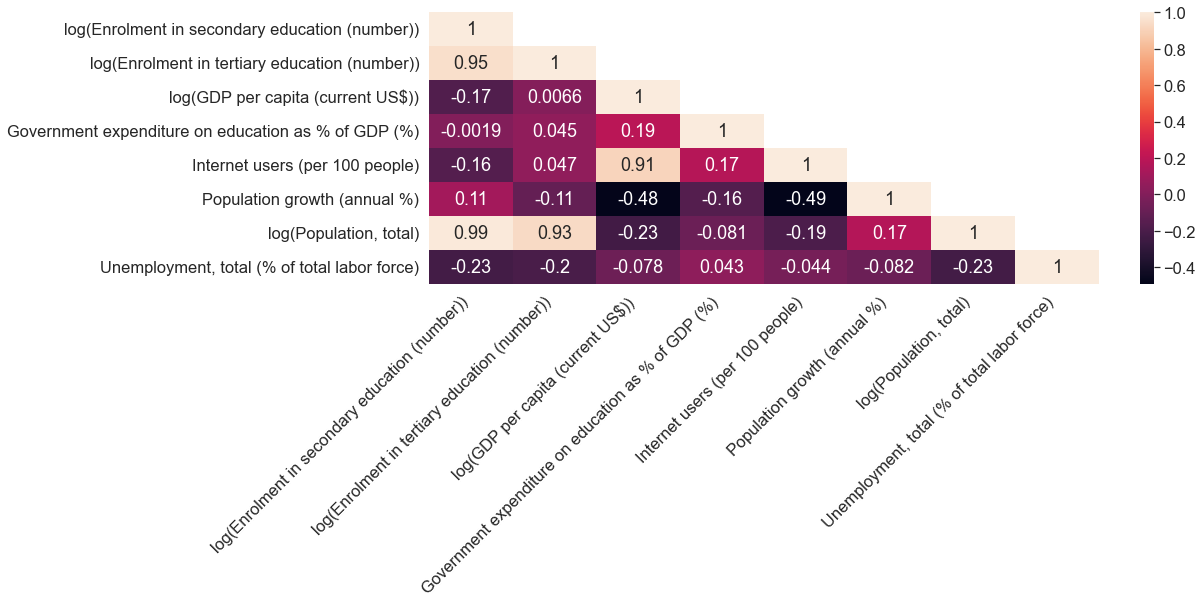

In [27]:
# Mesure du coeficient de corrélation (pearson) entre les variables. 


corr = DataPivot[DataPivot.columns.drop(['Country Name'])].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)

plt.rcParams["figure.figsize"] = (15,5)

sns.set(font_scale=1.5,style='white')
hm = sns.heatmap(corr, annot = True,mask=mask)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right')
hm.set(xlabel=None,ylabel=None)
plt.show()

### <a name="C8"> Prédiction des valeurs manquantes</a>

In [28]:
#Remplissage des nan par la méthode de l'iterative_imputer. 
#Cet algorithme effectue une régression linéaire pour chaque variable en fonction de toutes les autres afin de prédire les valeurs manquantes. 

#Chargement des librairies
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Chargement de l'imputer
imputer = IterativeImputer(max_iter=100, random_state=0)

#Ajustement de l'imputer avec les données (détermination des paramètres pour chaque variable)
imputer.fit(DataPivot[DataPivot.columns.drop(['Country Name'])])

#Création d'un jeu de donnée qui prend les données d'origines puis remplace les nan par leur valeur prédite. 
DataPivot_imp = pd.DataFrame(imputer.transform(DataPivot[DataPivot.columns.drop(['Country Name'])]),columns = DataPivot[DataPivot.columns.drop(['Country Name'])].columns)

# Rajout de la colonne Country Name 

DataPivot_imp['Country Name']=DataPivot['Country Name']


### <a name="C9"> Simplification du jeu de données</a>

In [29]:
# Reformattage des variables transformées en log dans leur dimension d'origine. 
# Addition des valeurs du secondaire et du tertiaire pour différents indicateurs afin de ne garder que le total des étudiants cibles.

DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"] = np.exp(DataPivot_imp["log(Enrolment in secondary education (number))"]) + np.exp(DataPivot_imp["log(Enrolment in tertiary education (number))"])
DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"] = np.log(DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"])


DataPivot_imp=DataPivot_imp.drop(columns=["log(Enrolment in secondary education (number))",
                                          "log(Enrolment in tertiary education (number))"])



In [30]:
DataPivot_imp

Indicator Name  log(GDP per capita (current US$))  \
0                                          6.3311   
1                                          8.3248   
2                                          8.2731   
3                                         10.5184   
4                                          8.1043   
..                                            ...   
194                                       10.5010   
195                                        7.9873   
196                                        6.8980   
197                                        7.1464   
198                                        6.9364   

Indicator Name  Government expenditure on education as % of GDP (%)  \
0                                                          3.3175     
1                                                          3.5394     
2                                                          4.5437     
3                                                          3.2537     
4                                                          4.2794     
..                                                            ...     
194                                                        4.6901     
195                                                        1.3223     
196                                                        4.3918     
197                                                        4.3890     
198                                                        8.4293     

Indicator Name  Internet users (per 100 people)  Population growth (annual %)  \
0                                       10.5957                        2.6892   
1                                       66.3634                       -0.1599   
2                                       42.9455                        1.8255   
3                                       97.9306                       -0.9440   
4                                       13.0000                        3.3676   
..                                          ...                           ...   
194                                     59.6083                       -0.6033   
195                                     61.1784                        2.8847   
196                                     24.5792                        2.4515   
197                                     25.5066                        3.0028   
198                                     23.1200                        2.3361   

Indicator Name  log(Population, total)  \
0                              17.3610   
1                              14.8719   
2                              17.5194   
3                              11.2552   
4                              17.1764   
..                                 ...   
194                            11.5420   
195                            15.3310   
196                            17.1328   
197                            16.6244   
198                            16.5975   

Indicator Name  Unemployment, total (% of total labor force)  \
0                                                     8.6000   
1                                                    15.2000   
2                                                    11.5000   
3                                                    11.2272   
4                                                     6.1000   
..                                                       ...   
194                                                   8.0000   
195                                                  27.0000   
196                                                  16.2000   
197                                                   7.6000   
198                                                   5.2000   

Indicator Name           Country Name  \
0                         Afghanistan   
1                             Albania   
2                             Algeria   
3                             Andorra   
4                              Angola   
..               

### <a name="C10"> Représentation des indicateurs et second filtrage des pays</a>

In [31]:
# La commande Describe permet d'obtenir les grandeurs statistiques générales par indicateurs
DataPivot_imp.describe()

Indicator Name  log(GDP per capita (current US$))  \
count                                    199.0000   
mean                                       8.6395   
std                                        1.4869   
min                                        5.6550   
25%                                        7.5767   
50%                                        8.5726   
75%                                        9.7151   
max                                       12.0326   

Indicator Name  Government expenditure on education as % of GDP (%)  \
count                                                    199.0000     
mean                                                       4.6127     
std                                                        1.4900     
min                                                        1.0220     
25%                                                        3.8518     
50%                                                        4.6125     
75%                                                        5.2287     
max                                                       12.4677     

Indicator Name  Internet users (per 100 people)  Population growth (annual %)  \
count                                  199.0000                      199.0000   
mean                                    51.1189                        1.3410   
std                                     28.3026                        1.1730   
min                                      0.0000                       -1.7975   
25%                                     25.4364                        0.4964   
50%                                     53.2268                        1.2396   
75%                                     76.1434                        2.2053   
max                                     98.2400                        5.2177   

Indicator Name  log(Population, total)  \
count                         199.0000   
mean                           15.5032   
std                             2.2451   
min                             9.3144   
25%                            14.1482   
50%                            15.8445   
75%                            17.0909   
max                            21.0444   

Indicator Name  Unemployment, total (% of total labor force)  \
count                                               199.0000   
mean                                                  8.8078   
std                                                   6.1094   
min                                                   0.2000   
25%                                                   4.7000   
50%                                                   7.0000   
75%                                                  11.3009   
max                                                  31.4000   

Indicator Name  log(Enrolment in Sec. and Ter. education (number))  
count                                                    199.0000   
mean                                                      13.1997   
std                                                        2.2443   
min                                                        7.3143   
25%                                                       11.7923   
50%                                                       13.5634   
75%                                                       14.7361   
max                                                       18.9009

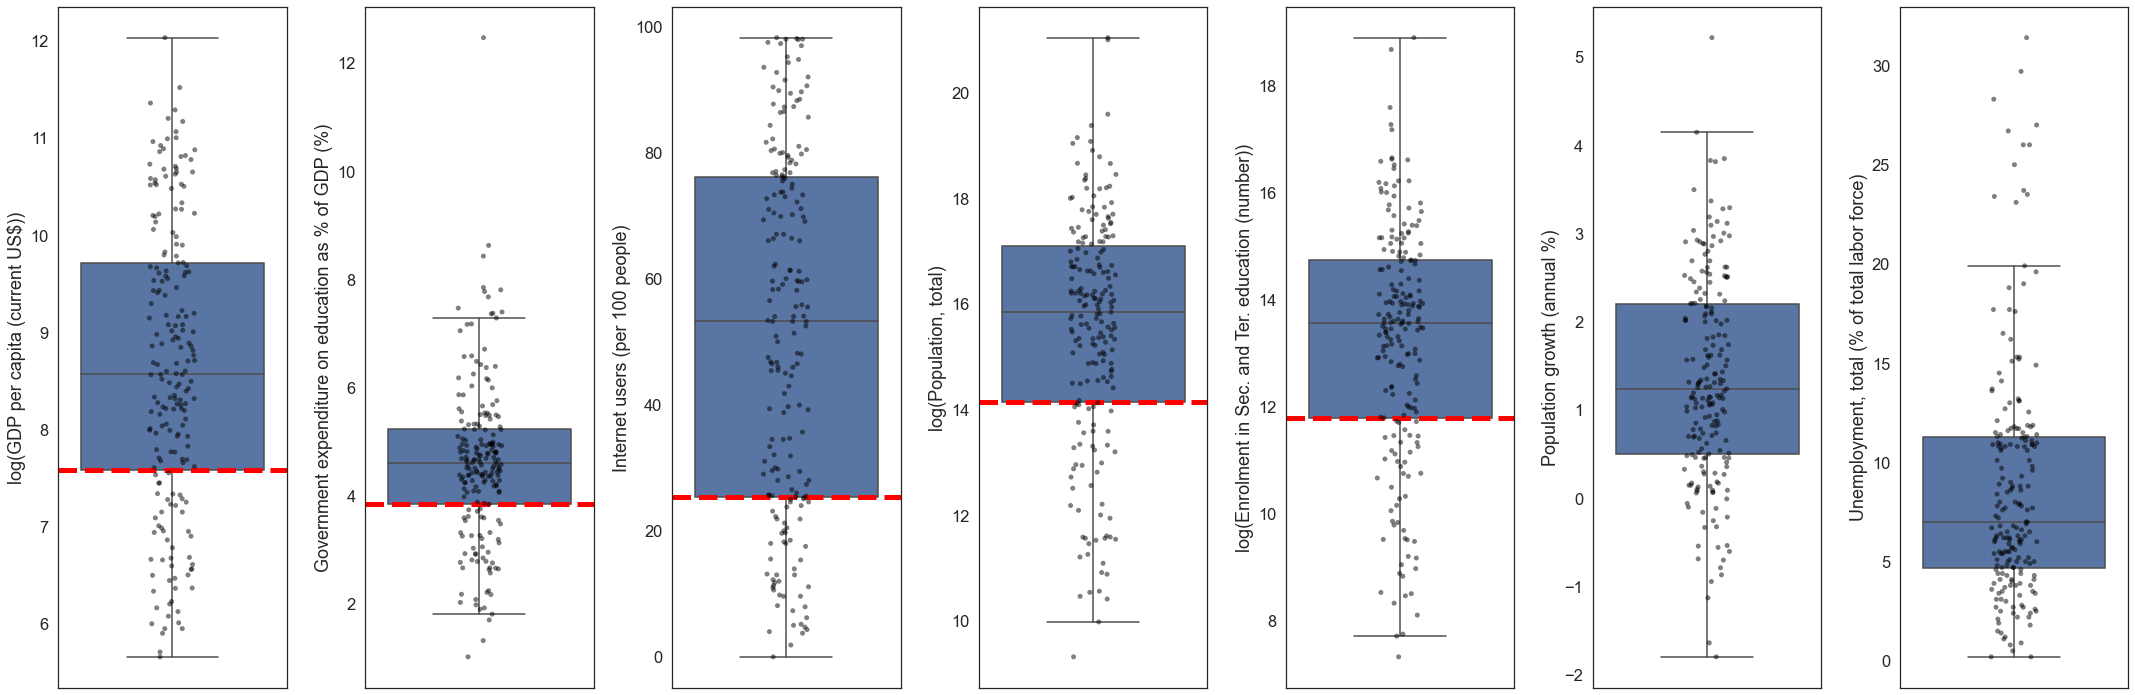

In [32]:
fig, axs = plt.subplots(ncols=7,nrows=1,figsize=(30,10))

sns.boxplot(ax=axs[0], y="log(GDP per capita (current US$))", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[0],y = "log(GDP per capita (current US$))",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[0].axhline(DataPivot_imp["log(GDP per capita (current US$))"].quantile(0.25), ls='--', color='red', lw=5)

sns.boxplot(ax=axs[1], y="Government expenditure on education as % of GDP (%)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[1],y = "Government expenditure on education as % of GDP (%)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[1].axhline(DataPivot_imp["Government expenditure on education as % of GDP (%)"].quantile(0.25), ls='--', color='red', lw=5)


sns.boxplot(ax=axs[2], y="Internet users (per 100 people)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[2],y = "Internet users (per 100 people)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[2].axhline(DataPivot_imp["Internet users (per 100 people)"].quantile(0.25), ls='--', color='red', lw=5)


sns.boxplot(ax=axs[3], y="log(Population, total)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[3],y = "log(Population, total)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[3].axhline(DataPivot_imp["log(Population, total)"].quantile(0.25), ls='--', color='red', lw=5)


sns.boxplot(ax=axs[4], y="log(Enrolment in Sec. and Ter. education (number))", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[4],y = "log(Enrolment in Sec. and Ter. education (number))",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[4].axhline(DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"].quantile(0.25), ls='--', color='red', lw=5)


sns.boxplot(ax=axs[5], y="Population growth (annual %)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[5],y = "Population growth (annual %)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)

sns.boxplot(ax=axs[6], y="Unemployment, total (% of total labor force)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[6],y = "Unemployment, total (% of total labor force)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)

fig.tight_layout()


In [33]:
#L'objectif de cette étude est de déterminer les meilleurs pays susceptibles d'acceuillir l'entreprise de cours en ligne. 
#L'étape ci-dessous filtre et retire les pays dont les indicateurs pricipaux (population growth et unemployment étant minoritaire) sont inférieurs aux premiers quartiles de chaque indicateur

DataPivot_imp_F = DataPivot_imp[(DataPivot_imp["log(GDP per capita (current US$))"] >= DataPivot_imp["log(GDP per capita (current US$))"].quantile(0.25) ) & 
                                               (DataPivot_imp["Government expenditure on education as % of GDP (%)"] >= DataPivot_imp["Government expenditure on education as % of GDP (%)"].quantile(0.25)) &
                                               (DataPivot_imp["Internet users (per 100 people)"] >= DataPivot_imp["Internet users (per 100 people)"].quantile(0.25)) & 
                                               (DataPivot_imp["log(Population, total)"] >= DataPivot_imp["log(Population, total)"].quantile(0.25))& 
                                               (DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"] >= DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"].quantile(0.25))].copy()

In [34]:
DataPivot_imp_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 2 to 193
Data columns (total 8 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   log(GDP per capita (current US$))                    77 non-null     float64
 1   Government expenditure on education as % of GDP (%)  77 non-null     float64
 2   Internet users (per 100 people)                      77 non-null     float64
 3   Population growth (annual %)                         77 non-null     float64
 4   log(Population, total)                               77 non-null     float64
 5   Unemployment, total (% of total labor force)         77 non-null     float64
 6   Country Name                                         77 non-null     object 
 7   log(Enrolment in Sec. and Ter. education (number))   77 non-null     float64
dtypes: float64(7), object(1)
memory usage: 5.4+ KB


# III) Création d'un indice de scoring

In [35]:
# Afin de créer un indice pouvant déterminer les pays cibles, nous utiliserons une moyenne arithmétique des différents indicateurs. 
# 1) Standardiser les données : MinMaxScaler()
# 2) Création d'un indice : moyenne arithmétique


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
DataPivot_imp_scaled = pd.DataFrame(scaler.fit_transform(DataPivot_imp_F.drop(columns=["Country Name"])),index=DataPivot_imp_F.index, columns = DataPivot_imp_F.drop(columns=["Country Name"]).columns )
DataPivot_imp_scaled[["Country Name"]]=DataPivot_imp_F[["Country Name"]]
DataPivot_imp_scaled['Score'] = DataPivot_imp_scaled.drop(columns=["Country Name"]).sum(axis=1)/7
DataPivot_imp_scaled.sort_values('Score', ascending = False).head(6)

Indicator Name  log(GDP per capita (current US$))  \
188                                        0.9111   
49                                         0.8911   
187                                        0.8140   
169                                        0.8829   
61                                         0.7894   
65                                         0.8254   

Indicator Name  Government expenditure on education as % of GDP (%)  \
188                                                        0.3188     
49                                                         1.0000     
187                                                        0.3825     
169                                                        0.8002     
61                                                         0.3424     
65                                                         0.2289     

Indicator Name  Internet users (per 100 people)  Population growth (annual %)  \
188                                      0.7051                        0.3550   
49                                       0.9954                        0.3752   
187                                      0.9648                        0.3671   
169                                      0.9191                        0.4066   
61                                       0.8370                        0.3143   
65                                       0.8932                        0.4264   

Indicator Name  log(Population, total)  \
188                             0.7787   
49                              0.1636   
187                             0.5356   
169                             0.2471   
61                              0.5385   
65                              0.5707   

Indicator Name  Unemployment, total (% of total labor force)  \
188                                                   0.1679   
49                                                    0.2176   
187                                                   0.1641   
169                                                   0.2481   
61                                                    0.3664   
65                                                    0.1374   

Indicator Name  log(Enrolment in Sec. and Ter. education (number))  \
188                                                        0.8319    
49                                                         0.2244    
187                                                        0.5854    
169                                                        0.2839    
61                                                         0.5751    
65                                                         0.6046    

Indicator Name    Country Name  Score  
188              United States 0.5812  
49                     Denmark 0.5525  
187             United Kingdom 0.5448  
169                     Sweden 0.5411  
61                      France 0.5376  
65                     Germany 0.5267

In [37]:
DataPivot_imp_scaled.sort_values('Score', ascending = False).head(6)[['Country Name','Score']]

Indicator Name    Country Name  Score
188              United States 0.5812
49                     Denmark 0.5525
187             United Kingdom 0.5448
169                     Sweden 0.5411
61                      France 0.5376
65                     Germany 0.5267

# IV) Représentation graphique des indicateurs

#### <a name="C11"> Ajout du code du pays et de la région géographique</a>

In [38]:
# Importation du fichiers contenant l'info des régions. 

Region = pd.read_csv('Data\EdStatsCountry.csv',sep=',')

# Récupération uniquement des variables d'intérets : 'Country Code' , 'Table Name' , 'Region'
print(Region.columns.values[[0,2,7]])
RegionF=Region[['Country Code', 'Table Name','Region']]

['Country Code' 'Table Name' 'Region']


In [39]:
# Jointure des données entre le jeu de données de base (PivotData_imp) et RegionF sur le nom des pays (noms différents entre les pays)
# Jointure à gauche afin d'attribuber une région à chaque pays présent dans nos données. 

DataPivot_imp_F = pd.merge(DataPivot_imp_F,RegionF, left_on ='Country Name',right_on ='Table Name' , how='left').set_axis(DataPivot_imp_F.index)

# retrait de Table name (doublon avec Country Name)
DataPivot_imp_F=DataPivot_imp_F.drop(columns=['Table Name'])

# Ajout du score construit a partir des données standardisées
DataPivot_imp_F['Score']=DataPivot_imp_scaled['Score']

In [40]:
# Aperçu du jeu de données

print(DataPivot_imp_F.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 2 to 193
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   log(GDP per capita (current US$))                    77 non-null     float64
 1   Government expenditure on education as % of GDP (%)  77 non-null     float64
 2   Internet users (per 100 people)                      77 non-null     float64
 3   Population growth (annual %)                         77 non-null     float64
 4   log(Population, total)                               77 non-null     float64
 5   Unemployment, total (% of total labor force)         77 non-null     float64
 6   Country Name                                         77 non-null     object 
 7   log(Enrolment in Sec. and Ter. education (number))   77 non-null     float64
 8   Country Code                                         77 non-null     ob

#### <a name="C12"> Représentations graphiques du score des pays d'intérêts</a>

In [41]:
import plotly.express as px

fig = px.choropleth(DataPivot_imp_F, locations="Country Code",
                    color="Score", # lifeExp is a column of gapminder
                    hover_name="Country Name", # column to add to hover information
                    color_continuous_scale="Viridis")
fig.update_layout(
    title={
        'text': "<b>Carte des scores des différents pays d'intérêts</b>",
        'font': {'size': 20},
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=1500, 
                  height=800)
fig.show()

In [42]:
Data_Selected_Countries = DataPivot_imp_F.sort_values('Score', ascending = False).head(6).reset_index(drop=True)
print(Data_Selected_Countries[["Country Name","Score"]])

     Country Name  Score
0   United States 0.5812
1         Denmark 0.5525
2  United Kingdom 0.5448
3          Sweden 0.5411
4          France 0.5376
5         Germany 0.5267


In [43]:
Data_Selected_Countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   log(GDP per capita (current US$))                    6 non-null      float64
 1   Government expenditure on education as % of GDP (%)  6 non-null      float64
 2   Internet users (per 100 people)                      6 non-null      float64
 3   Population growth (annual %)                         6 non-null      float64
 4   log(Population, total)                               6 non-null      float64
 5   Unemployment, total (% of total labor force)         6 non-null      float64
 6   Country Name                                         6 non-null      object 
 7   log(Enrolment in Sec. and Ter. education (number))   6 non-null      float64
 8   Country Code                                         6 non-null      objec

In [44]:
list(Data_Selected_Countries["Country Name"])


['United States', 'Denmark', 'United Kingdom', 'Sweden', 'France', 'Germany']

In [45]:
import plotly.graph_objects as go

from plotly.subplots import make_subplots

Data_Selected_Countries2=DataPivot_imp_scaled.sort_values('Score', ascending = False).head(6)
#Selected_Country_list = list(Data_Selected_Countries2["Country Name"])
Selected_Country_list = ['United States', 'Denmark', 'United Kingdom', 'Sweden', 'Germany']
Data_Selected_Countries2.drop(columns=['Country Name','Score'], inplace=True)

Data_Selected_Countries2=Data_Selected_Countries2.reindex(columns=['log(GDP per capita (current US$))',
                                        'log(Enrolment in Sec. and Ter. education (number))',
                                        'Government expenditure on education as % of GDP (%)',
                                        'Unemployment, total (% of total labor force)',
                                        'Population growth (annual %)',
                                        'log(Population, total)',
                                        'Internet users (per 100 people)' 
                                          ])

theta = [*Data_Selected_Countries2.columns.to_list(),Data_Selected_Countries2.columns[0]]

fig = make_subplots(rows=1, cols=5,specs=[[{'type': 'polar'}] * 5] * 1,
                    subplot_titles=Selected_Country_list,print_grid = True,vertical_spacing = 0.1)



fig.add_trace(
     go.Scatterpolar(
        theta=theta,
        r=list([*Data_Selected_Countries2.iloc[0].values[0:8],Data_Selected_Countries2.iloc[0].values[0]]),
        fill='toself'),
    row=1, col=1
)
fig.update_layout(polar = dict(angularaxis = dict(showticklabels = False)))


fig.add_trace(
     go.Scatterpolar(
        theta=theta,
        r=list([*Data_Selected_Countries2.iloc[1].values[0:8],Data_Selected_Countries2.iloc[1].values[0]]),
        fill='toself'),
    row=1, col=2
)
fig.update_layout(polar = dict(angularaxis = dict(showticklabels = False)))

fig.add_trace(
     go.Scatterpolar(
        theta=theta,
        r=list([*Data_Selected_Countries2.iloc[2].values[0:8],Data_Selected_Countries2.iloc[2].values[0]]),
        fill='toself'),
    row=1, col=3
)
fig.update_layout(polar = dict(angularaxis = dict(showticklabels = False)))

fig.add_trace(
     go.Scatterpolar(
        theta=theta,
        r=list([*Data_Selected_Countries2.iloc[3].values[0:8],Data_Selected_Countries2.iloc[3].values[0]]),
        fill='toself'),
    row=1, col=4
)
fig.update_layout(polar = dict(angularaxis = dict(showticklabels = False)))

fig.add_trace(
     go.Scatterpolar(
        theta=theta,
        r=list([*Data_Selected_Countries2.iloc[5].values[0:8],Data_Selected_Countries2.iloc[5].values[0]]),
        fill='toself'),
    row=1, col=5
)

fig.update_polars(angularaxis = dict(showticklabels = False))


fig.update_layout(height=500, width=2000, font=dict(size=12))


fig.update(layout_showlegend=False)



fig.show()

This is the format of your plot grid:
[ (1,1) polar  ]  [ (1,2) polar2 ]  [ (1,3) polar3 ]  [ (1,4) polar4 ]  [ (1,5) polar5 ]



In [46]:

Data_Selected_Countries2=DataPivot_imp_scaled.sort_values('Score', ascending = False).head(6)
Selected_Country_list = ["France"]

Data_Selected_Countries2.drop(columns=['Country Name','Score'], inplace=True)

Data_Selected_Countries2=Data_Selected_Countries2.reindex(columns=['log(GDP per capita (current US$))',
                                                                   'log(Enrolment in Sec. and Ter. education (number))',
                                          'Government expenditure on education as % of GDP (%)',
                                          'Unemployment, total (% of total labor force)',
                                          'Population growth (annual %)',
                                          'log(Population, total)',
                                          'Internet users (per 100 people)' 
                                          ])

theta = [*Data_Selected_Countries2.columns.to_list(),Data_Selected_Countries2.columns[0]]

fig = make_subplots(rows=1, cols=1,specs=[[{'type': 'polar'}] * 1] * 1,
                    subplot_titles=Selected_Country_list,print_grid = True,vertical_spacing = 0.1)


fig.add_trace(
     go.Scatterpolar(
        theta=theta,
        r=list([*Data_Selected_Countries2.iloc[4].values[0:8],Data_Selected_Countries2.iloc[4].values[0]]),
        fill='toself'),
    row=1, col=1
)


fig.update_layout(height=500, width=2000,font=dict(size=15))

fig.update_annotations(yshift=20)

fig.update(layout_showlegend=False)

   

fig.show()

This is the format of your plot grid:
[ (1,1) polar ]



In [47]:
# Représentation synthétique : 1 radar chart

Data_Selected_Countries3=DataPivot_imp_scaled.sort_values('Score', ascending = False).head(6)

Data_Selected_Countries3= Data_Selected_Countries3.reindex(columns=['Country Name', 'Score',
                                                                    'log(GDP per capita (current US$))',
                                                                   'log(Enrolment in Sec. and Ter. education (number))',
                                          'Government expenditure on education as % of GDP (%)',
                                          'Unemployment, total (% of total labor force)',
                                          'Population growth (annual %)',
                                          'log(Population, total)',
                                          'Internet users (per 100 people)' 
                                          ])

Data_Selected_Countries_wide = pd.melt(Data_Selected_Countries3,id_vars='Country Name', value_vars=Data_Selected_Countries3.drop(columns=["Score"]).columns.to_list())

fig = px.line_polar(Data_Selected_Countries_wide, r="value", theta="Indicator Name", line_close=True, color = "Country Name")
fig.update_traces(fill='toself')

fig.update_layout(width=1600, 
                  height=800,font=dict(size=15),title_text="<b> Graphes en radar des différents indicateurs (standardisés) des 6 pays au plus haut score </b> ")

fig.show()

C:\Users\ClementD\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ClementD\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ClementD\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ClementD\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ClementD\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas

### <a name="C13"> Représentation des indicateurs par REGION</a>

In [48]:
# Jointure des données entre le jeu de données de base (PivotData_imp) et RegionF sur le nom des pays (noms différents entre les pays)
# Jointure à gauche afin d'attribuber une région à chaque pays présent dans nos données. 

DataPivot_imp = pd.merge(DataPivot_imp,RegionF, left_on ='Country Name',right_on ='Table Name' , how='left')


DataPivot_imp=DataPivot_imp.drop(columns=["Table Name","Country Code"])
DataPivot_imp


log(GDP per capita (current US$))  \
0                               6.3311   
1                               8.3248   
2                               8.2731   
3                              10.5184   
4                               8.1043   
..                                 ...   
194                            10.5010   
195                             7.9873   
196                             6.8980   
197                             7.1464   
198                             6.9364   

     Government expenditure on education as % of GDP (%)  \
0                                               3.3175     
1                                               3.5394     
2                                               4.5437     
3                                               3.2537     
4                                               4.2794     
..                                                 ...     
194                                             4.6901     
195                                             1.3223     
196                                             4.3918     
197                                             4.3890     
198                                             8.4293     

     Internet users (per 100 people)  Population growth (annual %)  \
0                            10.5957                        2.6892   
1                            66.3634                       -0.1599   
2                            42.9455                        1.8255   
3                            97.9306                       -0.9440   
4                            13.0000                        3.3676   
..                               ...                           ...   
194                          59.6083                       -0.6033   
195                          61.1784                        2.8847   
196                          24.5792                        2.4515   
197                          25.5066                        3.0028   
198                          23.1200                        2.3361   

     log(Population, total)  Unemployment, total (% of total labor force)  \
0                   17.3610                                        8.6000   
1                   14.8719                                       15.2000   
2                   17.5194                                       11.5000   
3                   11.2552                                       11.2272   
4                   17.1764                                        6.1000   
..                      ...                                           ...   
194                 11.5420                                        8.0000   
195                 15.3310                                       27.0000   
196                 17.1328                                       16.2000   
197                 16.6244                                        7.6000   
198                 16.5975                                        5.2000   

              Country Name  \
0              Afghanistan   
1                  Albania   
2                  Algeria   
3                  Andorra   
4                   Angola   
..                     ...   
194  Virgin Islands (U.S.)   
195     West Bank and Gaza   
196            Yemen, Rep.   
197                 Zambia   
198               Zimbabwe   

     log(Enrolment in Sec. and Ter. education (number))  \
0                                              14.9013    
1                                              13.0723    
2                                              15.3828    
3                                               8.4962    
4                                              14.5613    
..                                                 ...    
194                                             9.5280    
195                                            13.7562    
196                                            14.5412    
197                                            13.5981    
198

In [49]:
# On retourne au jeu de donnée non filtré pour lui ajouter une colonne contenant les scores des pays de l'étude
DataPivot_imp=pd.concat([DataPivot_imp,DataPivot_imp_F["Score"]], axis=1)

# Création d'une colonne Color pour la représentation graphique : Les points rouges seront les pays filtrés utilisés pour le scoring
DataPivot_imp['Color']=DataPivot_imp['Score'].isna()
DataPivot_imp

log(GDP per capita (current US$))  \
0                               6.3311   
1                               8.3248   
2                               8.2731   
3                              10.5184   
4                               8.1043   
..                                 ...   
194                            10.5010   
195                             7.9873   
196                             6.8980   
197                             7.1464   
198                             6.9364   

     Government expenditure on education as % of GDP (%)  \
0                                               3.3175     
1                                               3.5394     
2                                               4.5437     
3                                               3.2537     
4                                               4.2794     
..                                                 ...     
194                                             4.6901     
195                                             1.3223     
196                                             4.3918     
197                                             4.3890     
198                                             8.4293     

     Internet users (per 100 people)  Population growth (annual %)  \
0                            10.5957                        2.6892   
1                            66.3634                       -0.1599   
2                            42.9455                        1.8255   
3                            97.9306                       -0.9440   
4                            13.0000                        3.3676   
..                               ...                           ...   
194                          59.6083                       -0.6033   
195                          61.1784                        2.8847   
196                          24.5792                        2.4515   
197                          25.5066                        3.0028   
198                          23.1200                        2.3361   

     log(Population, total)  Unemployment, total (% of total labor force)  \
0                   17.3610                                        8.6000   
1                   14.8719                                       15.2000   
2                   17.5194                                       11.5000   
3                   11.2552                                       11.2272   
4                   17.1764                                        6.1000   
..                      ...                                           ...   
194                 11.5420                                        8.0000   
195                 15.3310                                       27.0000   
196                 17.1328                                       16.2000   
197                 16.6244                                        7.6000   
198                 16.5975                                        5.2000   

              Country Name  \
0              Afghanistan   
1                  Albania   
2                  Algeria   
3                  Andorra   
4                   Angola   
..                     ...   
194  Virgin Islands (U.S.)   
195     West Bank and Gaza   
196            Yemen, Rep.   
197                 Zambia   
198               Zimbabwe   

     log(Enrolment in Sec. and Ter. education (number))  \
0                                              14.9013    
1                                              13.0723    
2                                              15.3828    
3                                               8.4962    
4                                              14.5613    
..                                                 ...    
194                                             9.5280    
195                                            13.7562    
196                                            14.5412    
197                                            13.5981    
198

In [50]:
# Descriptions statistiques des indicateurs par régions : 
DataPivot_imp.groupby('Region').describe()

log(GDP per capita (current US$))                 \
                                                       count    mean    std   
Region                                                                        
East Asia & Pacific                                  30.0000  8.8722 1.2920   
Europe & Central Asia                                52.0000  9.6219 1.2275   
Latin America & Caribbean                            37.0000  9.0122 0.8340   
Middle East & North Africa                           20.0000  8.9447 1.1935   
North America                                         3.0000 10.9901 0.3558   
South Asia                                            8.0000  7.5323 0.9283   
Sub-Saharan Africa                                   45.0000  7.0513 1.0254   

                                                                    \
                               min     25%     50%     75%     max   
Region                                                               
East Asia & Pacific         7.0863  7.9666  8.2653 10.2179 11.2008   
Europe & Central Asia       6.6794  8.7216  9.7481 10.6549 12.0326   
Latin America & Caribbean   6.6061  8.4926  8.9755  9.5793 10.8077   
Middle East & North Africa  6.8980  8.1125  8.4980 10.0520 10.9908   
North America              10.6492 10.8056 10.9619 11.1606 11.3592   
South Asia                  6.3311  7.0587  7.3595  8.0089  9.2221   
Sub-Saharan Africa          5.6550  6.3604  6.7790  7.6851  9.6208   

                           Government expenditure on education as % of GDP (%)  \
                                                                         count   
Region                                                                           
East Asia & Pacific                                                   30.0000    
Europe & Central Asia                                                 52.0000    
Latin America & Caribbean                                             37.0000    
Middle East & North Africa                                            20.0000    
North America                                                          3.0000    
South Asia                                                             8.0000    
Sub-Saharan Africa                                                    45.0000    

                                   ...  \
                             mean  ...   
Region                             ...   
East Asia & Pacific        4.6759  ...   
Europe & Central Asia      4.8786  ...   
Latin America & Caribbean  4.9102  ...   
Middle East & North Africa 4.4219  ...   
North America              4.0089  ...   
South Asia                 3.7762  ...   
Sub-Saharan Africa         4.3052  ...   

                           log(Enrolment in Sec. and Ter. education (number))  \
                                                                          75%   
Region                                                                          
East Asia & Pacific                                                   15.1572   
Europe & Central Asia                                                 14.4094   
Latin America & Caribbean                                             14.1615   
Middle East & North Africa                                            14.9642   
North America                                                         16.4319   
South Asia                                                            16.4950   
Sub-Saharan Africa                                                    14.1867   

                                     Score                                     \
                               max   count   mean    std    min    25%    50%   
Region                                                                          
East Asia & Pacific        18.6791  8.0000 0.4190 0.0777 0.2994 0.3596 0.4379   
Europe & Central Asia      16.6506 33.0000 0.4046 0.0945 0.2437 0.3274 0.4156   
Latin America & Caribbean  17.2746 18.0000 0.3429 0.0803 0.2223 0.2828 0.3401

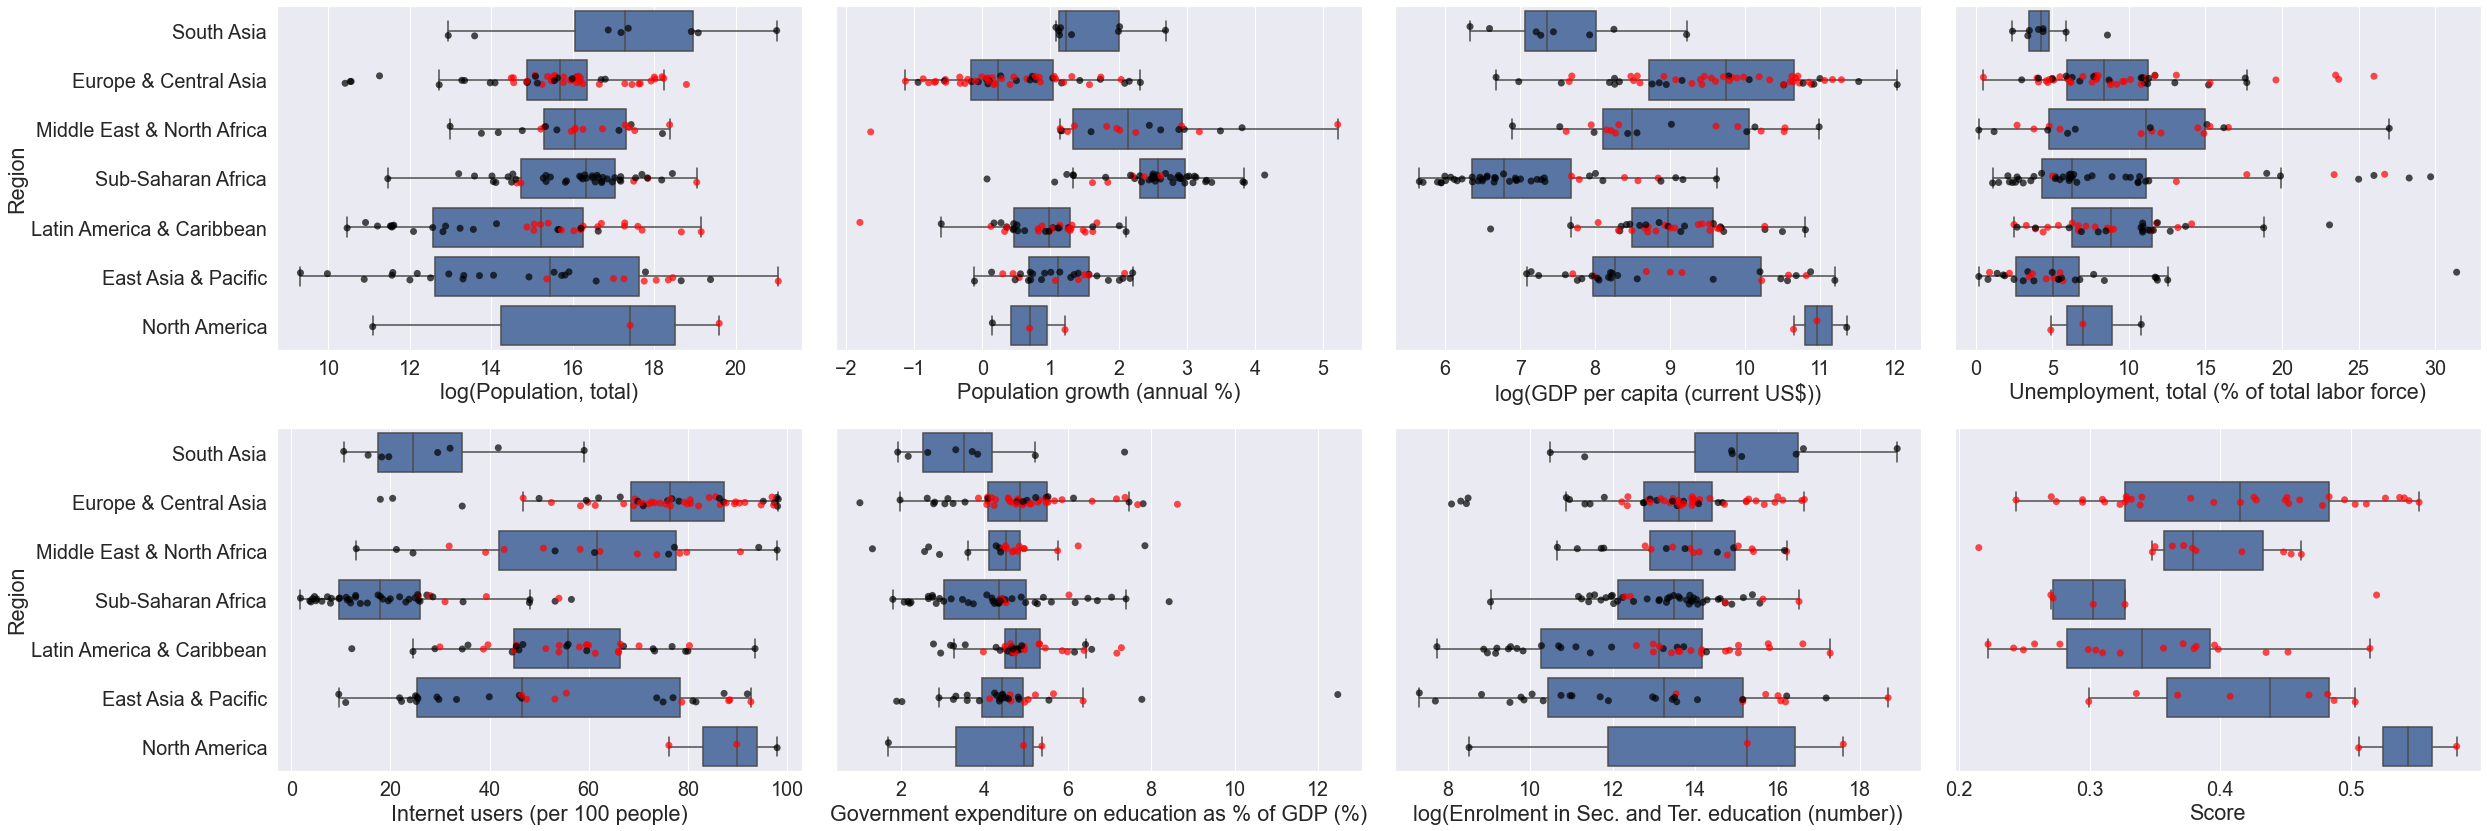

In [51]:
sns.set(font_scale=1.8)

fig, axs = plt.subplots(ncols=4,nrows=2,figsize=(35,12))

sns.boxplot(ax=axs[0,2], y="Region", x="log(GDP per capita (current US$))", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[0,2],x = "log(GDP per capita (current US$))",
              y ="Region",
              alpha = 0.7,
              hue='Color',
              palette=["red", "black"],
              data = DataPivot_imp,
              size=7)

sns.boxplot(ax=axs[1,1], y="Region", x="Government expenditure on education as % of GDP (%)", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[1,1],x = "Government expenditure on education as % of GDP (%)",
              y ="Region",
              hue='Color',
              palette=["red", "black"],
              alpha = 0.7,
              data = DataPivot_imp,
              size=7)

sns.boxplot(ax=axs[1,0], y="Region", x="Internet users (per 100 people)", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[1,0],x = "Internet users (per 100 people)",
              y ="Region",
              hue='Color',
              palette=["red", "black"],
              alpha = 0.7,
              data = DataPivot_imp,
              size=7)

sns.boxplot(ax=axs[0,1], y="Region", x="Population growth (annual %)", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[0,1],x = "Population growth (annual %)",
              y ="Region",
              hue='Color',
              palette=["red", "black"],
              alpha = 0.7,
              data = DataPivot_imp,
              size=7)

sns.boxplot(ax=axs[0,0], y="Region", x="log(Population, total)", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[0,0],x ="log(Population, total)",
              y ="Region",
              hue='Color',
              palette=["red", "black"],
              alpha = 0.7,
              data = DataPivot_imp,
              size=7)

sns.boxplot(ax=axs[0,3], y="Region", x="Unemployment, total (% of total labor force)", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[0,3],x = "Unemployment, total (% of total labor force)",
              y ="Region",
              hue='Color',
              palette=["red", "black"],
              alpha = 0.7,
              data = DataPivot_imp,
              size=7)



sns.boxplot(ax=axs[1,2], y="Region", x="log(Enrolment in Sec. and Ter. education (number))", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[1,2],x = "log(Enrolment in Sec. and Ter. education (number))",
              y ="Region",
              hue='Color',
              palette=["red", "black"],
              alpha = 0.7,
              data = DataPivot_imp,
              size=7)

sns.boxplot(ax=axs[1,3], y="Region", x="Score", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[1,3],x = "Score",
              y ="Region",
              hue='Color',
              palette=["red", "black"],
              alpha = 0.7,
              data = DataPivot_imp,
              size=7)

axs[0,0].get_legend().remove()

axs[0,1].set(ylabel=None,yticklabels=[])
axs[0,1].get_legend().remove()

axs[0,2].set(ylabel=None,yticklabels=[])
axs[0,2].get_legend().remove()

axs[0,3].set(ylabel=None,yticklabels=[])
axs[0,3].get_legend().remove()

axs[1,0].get_legend().remove()

axs[1,1].set(ylabel=None,yticklabels=[])
axs[1,1].get_legend().remove()

axs[1,2].set(ylabel=None,yticklabels=[])
axs[1,2].get_legend().remove()

axs[1,3].set(ylabel=None,yticklabels=[])
axs[1,3].get_legend().remove()


fig.tight_layout()


plt.show()

### Analyse des régions ayant le plus de pays à fort potentiel

In [52]:
DataPivot_imp_F['mean_score'] = DataPivot_imp_F.groupby('Region')['Score'].transform('mean')

In [53]:

fig = px.choropleth(DataPivot_imp_F, locations="Country Code",
                    color="mean_score", # lifeExp is a column of gapminder
                    hover_name="Country Name", # column to add to hover information
                    color_continuous_scale="Viridis",range_color=[0.24,0.60])
fig.update_layout(
    title={
        'text': "<b>Carte des scores moyens par région</b>",
        'font': {'size': 20},
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=1200, 
                  height=700)
fig.show()

Text(0.5, 0, 'Score moyen')

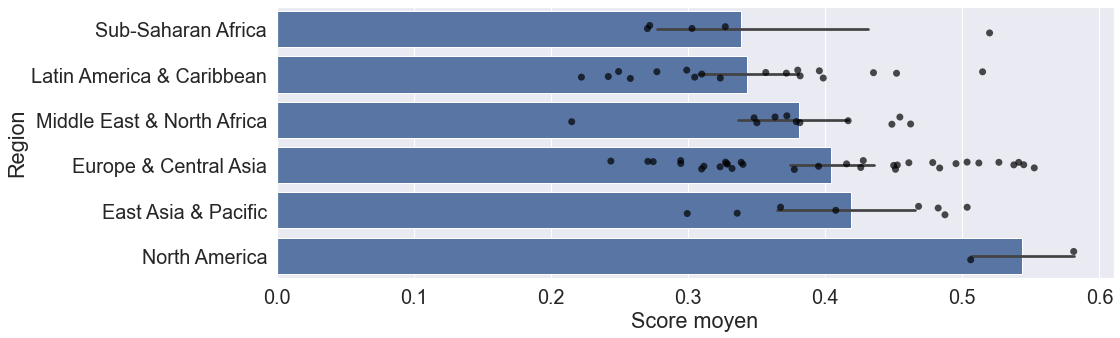

In [54]:
ax=sns.barplot(y="Region", x="Score", data=DataPivot_imp_F.sort_values('mean_score'),color="b")

sns.stripplot(x = "Score",
              y ="Region",
              alpha = 0.7,
              data = DataPivot_imp_F.sort_values('mean_score'),
              size=7,
              color='black')
ax.set_xlabel("Score moyen")


### <a name="C14"> Evolution dans le temps des indicateurs à l'échelle régionale</a>

In [55]:
list(DataPivot_imp["Country Name"].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guinea-B

In [56]:
list(DataPivot_imp["Region"].unique())

['South Asia',
 'Europe & Central Asia',
 'Middle East & North Africa',
 'Sub-Saharan Africa',
 'Latin America & Caribbean',
 'East Asia & Pacific',
 'North America',
 nan]

In [57]:
ColumnsToKeep=["Country Name",
               "Enrolment in secondary education, both sexes (number)",
               "Enrolment in tertiary education, all programmes, both sexes (number)",
               "GDP per capita (current US$)",
               "Government expenditure on education as % of GDP (%)",
               "Internet users (per 100 people)",
               "Population growth (annual %)",
               "Population, total",
               "Unemployment, total (% of total labor force)",
               ]



#Reprise du jeu de données original avec toutes les informations  :  Selection des pays et des indicateurs d'intérêts
dataTempoRegion=Data[(Data['Country Name'].isin(list(DataPivot_imp["Country Name"].unique()))) & (Data['Indicator Name'].isin(ColumnsToKeep))] 

#Réorganisation du jeu de donnée (format Wide, ou tidy) et suppression des années des projections de Witt. 
yearToKeep=dataTempoRegion.columns.to_list()[4:51]
dataTempoRegion=pd.melt(dataTempoRegion, id_vars=["Indicator Name","Country Name"], value_vars=[*yearToKeep],var_name='Year')
dataTempoRegion

Indicator Name Country Name  Year  \
0      Enrolment in secondary education, both sexes (...  Afghanistan  1970   
1      Enrolment in tertiary education, all programme...  Afghanistan  1970   
2                           GDP per capita (current US$)  Afghanistan  1970   
3      Government expenditure on education as % of GD...  Afghanistan  1970   
4                        Internet users (per 100 people)  Afghanistan  1970   
...                                                  ...          ...   ...   
74819  Government expenditure on education as % of GD...     Zimbabwe  2016   
74820                    Internet users (per 100 people)     Zimbabwe  2016   
74821                       Population growth (annual %)     Zimbabwe  2016   
74822                                  Population, total     Zimbabwe  2016   
74823       Unemployment, total (% of total labor force)     Zimbabwe  2016   

              value  
0       116174.0000  
1         7732.0000  
2          157.1874  
3               NaN  
4               NaN  
...             ...  
74819           NaN  
74820       23.1200  
74821        2.3361  
74822 16150362.0000  
74823        5.2000  

[74824 rows x 4 columns]

In [58]:
# Afin de calculer la somme du recrutement en secondaire et tertiaire, il faut repasser en format 'Long'
dataTempoRegion=dataTempoRegion.pivot_table(index=['Country Name','Year'], columns='Indicator Name', values='value').reset_index()
dataTempoRegion["log(Enrolment in Sec. and Ter. education (number))"] = np.log(dataTempoRegion["Enrolment in secondary education, both sexes (number)"] + dataTempoRegion["Enrolment in tertiary education, all programmes, both sexes (number)"])
dataTempoRegion["log(Population, total)"] = np.log(dataTempoRegion["Population, total"])
dataTempoRegion["log(GDP per capita (current US$))"] = np.log(dataTempoRegion["GDP per capita (current US$)"])
dataTempoRegion=dataTempoRegion.drop(columns=["Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","Population, total","GDP per capita (current US$)"])
dataTempoRegion

Indicator Name Country Name  Year  \
0               Afghanistan  1970   
1               Afghanistan  1971   
2               Afghanistan  1972   
3               Afghanistan  1973   
4               Afghanistan  1974   
...                     ...   ...   
9277               Zimbabwe  2012   
9278               Zimbabwe  2013   
9279               Zimbabwe  2014   
9280               Zimbabwe  2015   
9281               Zimbabwe  2016   

Indicator Name  Government expenditure on education as % of GDP (%)  \
0                                                             NaN     
1                                                          1.1604     
2                                                          1.1172     
3                                                          1.4279     
4                                                             NaN     
...                                                           ...     
9277                                                       8.3832     
9278                                                       8.4854     
9279                                                       8.4293     
9280                                                          NaN     
9281                                                          NaN     

Indicator Name  Internet users (per 100 people)  Population growth (annual %)  \
0                                           NaN                        2.4723   
1                                           NaN                        2.5880   
2                                           NaN                        2.6287   
3                                           NaN                        2.5760   
4                                           NaN                        2.4127   
...                                         ...                           ...   
9277                                    12.0000                        2.2283   
9278                                    15.5000                        2.3094   
9279                                    16.3647                        2.3448   
9280                                    22.7428                        2.3456   
9281                                    23.1200                        2.3361   

Indicator Name  Unemployment, total (% of total labor force)  \
0                                                        NaN   
1                                                        NaN   
2                                                        NaN   
3                                                        NaN   
4                                                        NaN   
...                                                      ...   
9277                                                  5.3000   
9278                                                  5.2000   
9279                                                  5.1000   
9280                                                  5.1000   
9281                                                  5.2000   

Indicator Name  log(Enrolment in Sec. and Ter. education (number))  \
0                                                         11.7273    
1                                                         11.8739    
2                                                         12.0008    
3                                                         12.0830    
4                                                         12.1213    
...                                                           ...    
9277                                                      13.8458    
9278                                                      13.8658    
9279                                                          NaN    
9280                                                          NaN    
9281                                                          NaN    

Indicator Name  log(Population, total)  log(GDP per capita (current US$))  
0                              16.2248     

In [59]:
# Remise en format Tidy
dataTempoRegionTidy=pd.melt(dataTempoRegion, id_vars=["Year","Country Name"], value_vars=[*dataTempoRegion.columns.to_list()[2:9]])

#transformation de l'année str en int (il ne sera pas nécessaire de le transformer en date time)
dataTempoRegionTidy['Year_Int'] = dataTempoRegionTidy['Year'].astype(int)
dataTempoRegionTidy

Year Country Name                                     Indicator Name  \
0      1970  Afghanistan  Government expenditure on education as % of GD...   
1      1971  Afghanistan  Government expenditure on education as % of GD...   
2      1972  Afghanistan  Government expenditure on education as % of GD...   
3      1973  Afghanistan  Government expenditure on education as % of GD...   
4      1974  Afghanistan  Government expenditure on education as % of GD...   
...     ...          ...                                                ...   
64969  2012     Zimbabwe                  log(GDP per capita (current US$))   
64970  2013     Zimbabwe                  log(GDP per capita (current US$))   
64971  2014     Zimbabwe                  log(GDP per capita (current US$))   
64972  2015     Zimbabwe                  log(GDP per capita (current US$))   
64973  2016     Zimbabwe                  log(GDP per capita (current US$))   

       value  Year_Int  
0        NaN      1970  
1     1.1604      1971  
2     1.1172      1972  
3     1.4279      1973  
4        NaN      1974  
...      ...       ...  
64969 6.8754      2012  
64970 6.9338      2013  
64971 6.9384      2014  
64972 6.9406      2015  
64973 6.9364      2016  

[64974 rows x 5 columns]

In [60]:
#Ajout des régions géographiques par une jointure comme précédemment
dataTempoRegionTidy = pd.merge(dataTempoRegionTidy,DataPivot_imp[['Country Name','Region']], on ='Country Name',how='left')
dataTempoRegionTidy

Year Country Name                                     Indicator Name  \
0      1970  Afghanistan  Government expenditure on education as % of GD...   
1      1971  Afghanistan  Government expenditure on education as % of GD...   
2      1972  Afghanistan  Government expenditure on education as % of GD...   
3      1973  Afghanistan  Government expenditure on education as % of GD...   
4      1974  Afghanistan  Government expenditure on education as % of GD...   
...     ...          ...                                                ...   
64969  2012     Zimbabwe                  log(GDP per capita (current US$))   
64970  2013     Zimbabwe                  log(GDP per capita (current US$))   
64971  2014     Zimbabwe                  log(GDP per capita (current US$))   
64972  2015     Zimbabwe                  log(GDP per capita (current US$))   
64973  2016     Zimbabwe                  log(GDP per capita (current US$))   

       value  Year_Int              Region  
0        NaN      1970          South Asia  
1     1.1604      1971          South Asia  
2     1.1172      1972          South Asia  
3     1.4279      1973          South Asia  
4        NaN      1974          South Asia  
...      ...       ...                 ...  
64969 6.8754      2012  Sub-Saharan Africa  
64970 6.9338      2013  Sub-Saharan Africa  
64971 6.9384      2014  Sub-Saharan Africa  
64972 6.9406      2015  Sub-Saharan Africa  
64973 6.9364      2016  Sub-Saharan Africa  

[64974 rows x 6 columns]

<Figure size 1440x1440 with 0 Axes>

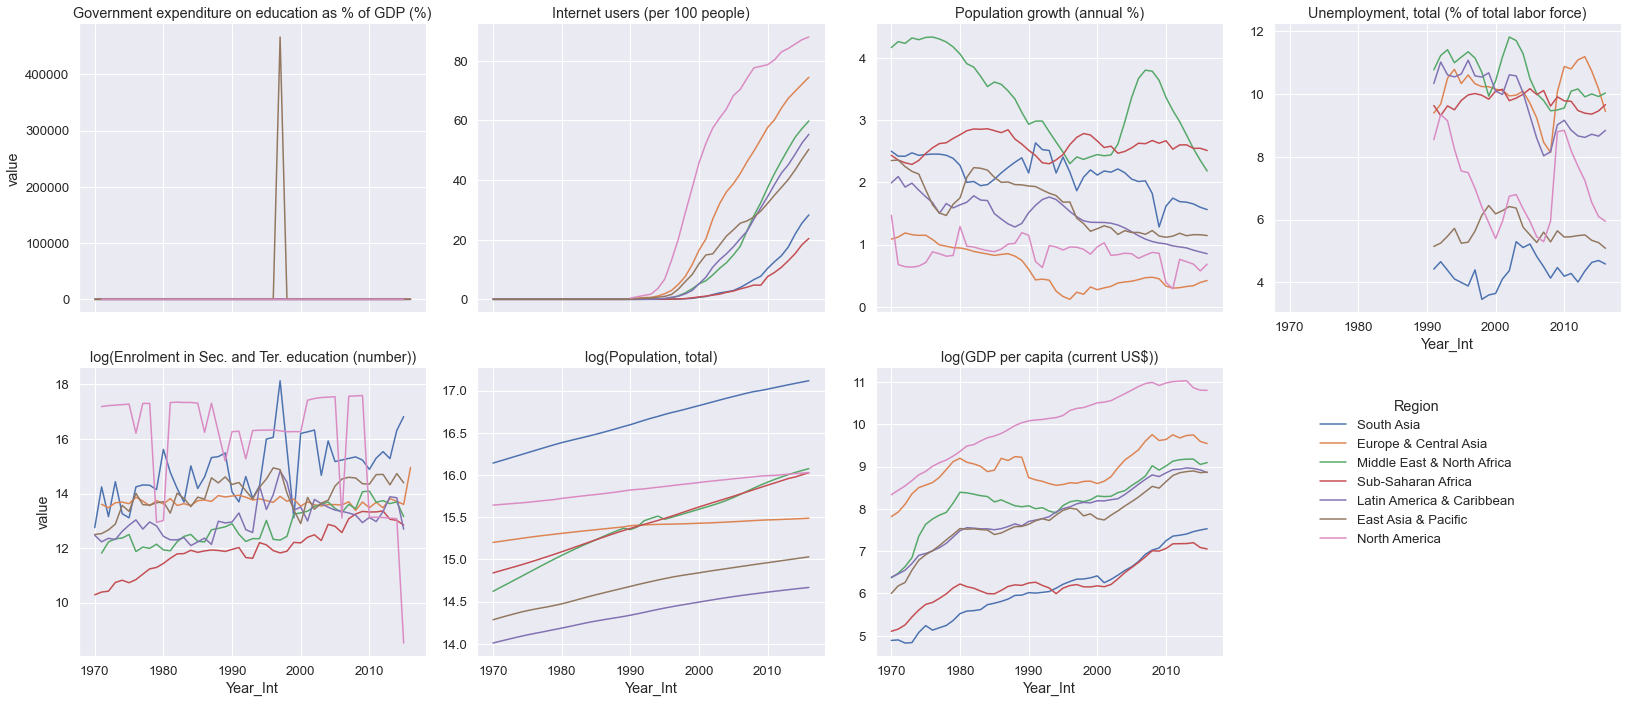

In [61]:
plt.figure(figsize=(20,20))

sns.set(font_scale=1.2)


lm = sns.relplot(x='Year_Int', y='value', col='Indicator Name', hue='Region', data=dataTempoRegionTidy, kind="line", facet_kws={'sharey': False, 'sharex': True},col_wrap=4,ci=None)
fig = lm.fig
fig.axes[0].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[0])
fig.axes[1].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[1])
fig.axes[2].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[2])
fig.axes[3].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[3])
fig.axes[4].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[4])
fig.axes[5].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[5])
fig.axes[6].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[6])
sns.move_legend(lm, "upper left", bbox_to_anchor=(.80, .45))

plt.tight_layout()
plt.show()


In [62]:
print("Valeur maximale des indicateurs: ")
print("")
print(dataTempoRegionTidy.groupby(['Indicator Name'])['value'].max())
print("")
print("_"*30)
print("")
print("ID de la valeur maximale: ")
print("")
print(dataTempoRegionTidy.groupby(['Indicator Name'])['value'].idxmax())

Valeur maximale des indicateurs: 

Indicator Name
Government expenditure on education as % of GDP (%)   3730833.5000
Internet users (per 100 people)                            98.3236
Population growth (annual %)                               17.6953
Unemployment, total (% of total labor force)               39.3000
log(Enrolment in Sec. and Ter. education (number))         18.9009
log(GDP per capita (current US$))                          12.1704
log(Population, total)                                     21.0444
Name: value, dtype: float64

______________________________

ID de la valeur maximale: 

Indicator Name
Government expenditure on education as % of GDP (%)     8577
Internet users (per 100 people)                        10267
Population growth (annual %)                           27258
Unemployment, total (% of total labor force)           32448
log(Enrolment in Sec. and Ter. education (number))     40855
log(GDP per capita (current US$))                      61198
log(Populat

In [63]:
# Remplacement de la valeur aberrante par NaN 

print(dataTempoRegionTidy.at[8577,'value'])
dataTempoRegionTidy.at[8577,'value'] = np.nan
print(dataTempoRegionTidy.at[8577,'value'])

3730833.5
nan


In [64]:
# Création d'une colonne 'moving' contenant les moyennes glissantes (avec un pas de 5 ans) afin de lisser les séries temporelles et dégager une tendance. 
dataTempoRegionTidy['Value (moving average ~5 years)'] = dataTempoRegionTidy.groupby(['Indicator Name','Country Name'])['value'].transform(lambda x: x.rolling(5, 1).mean())

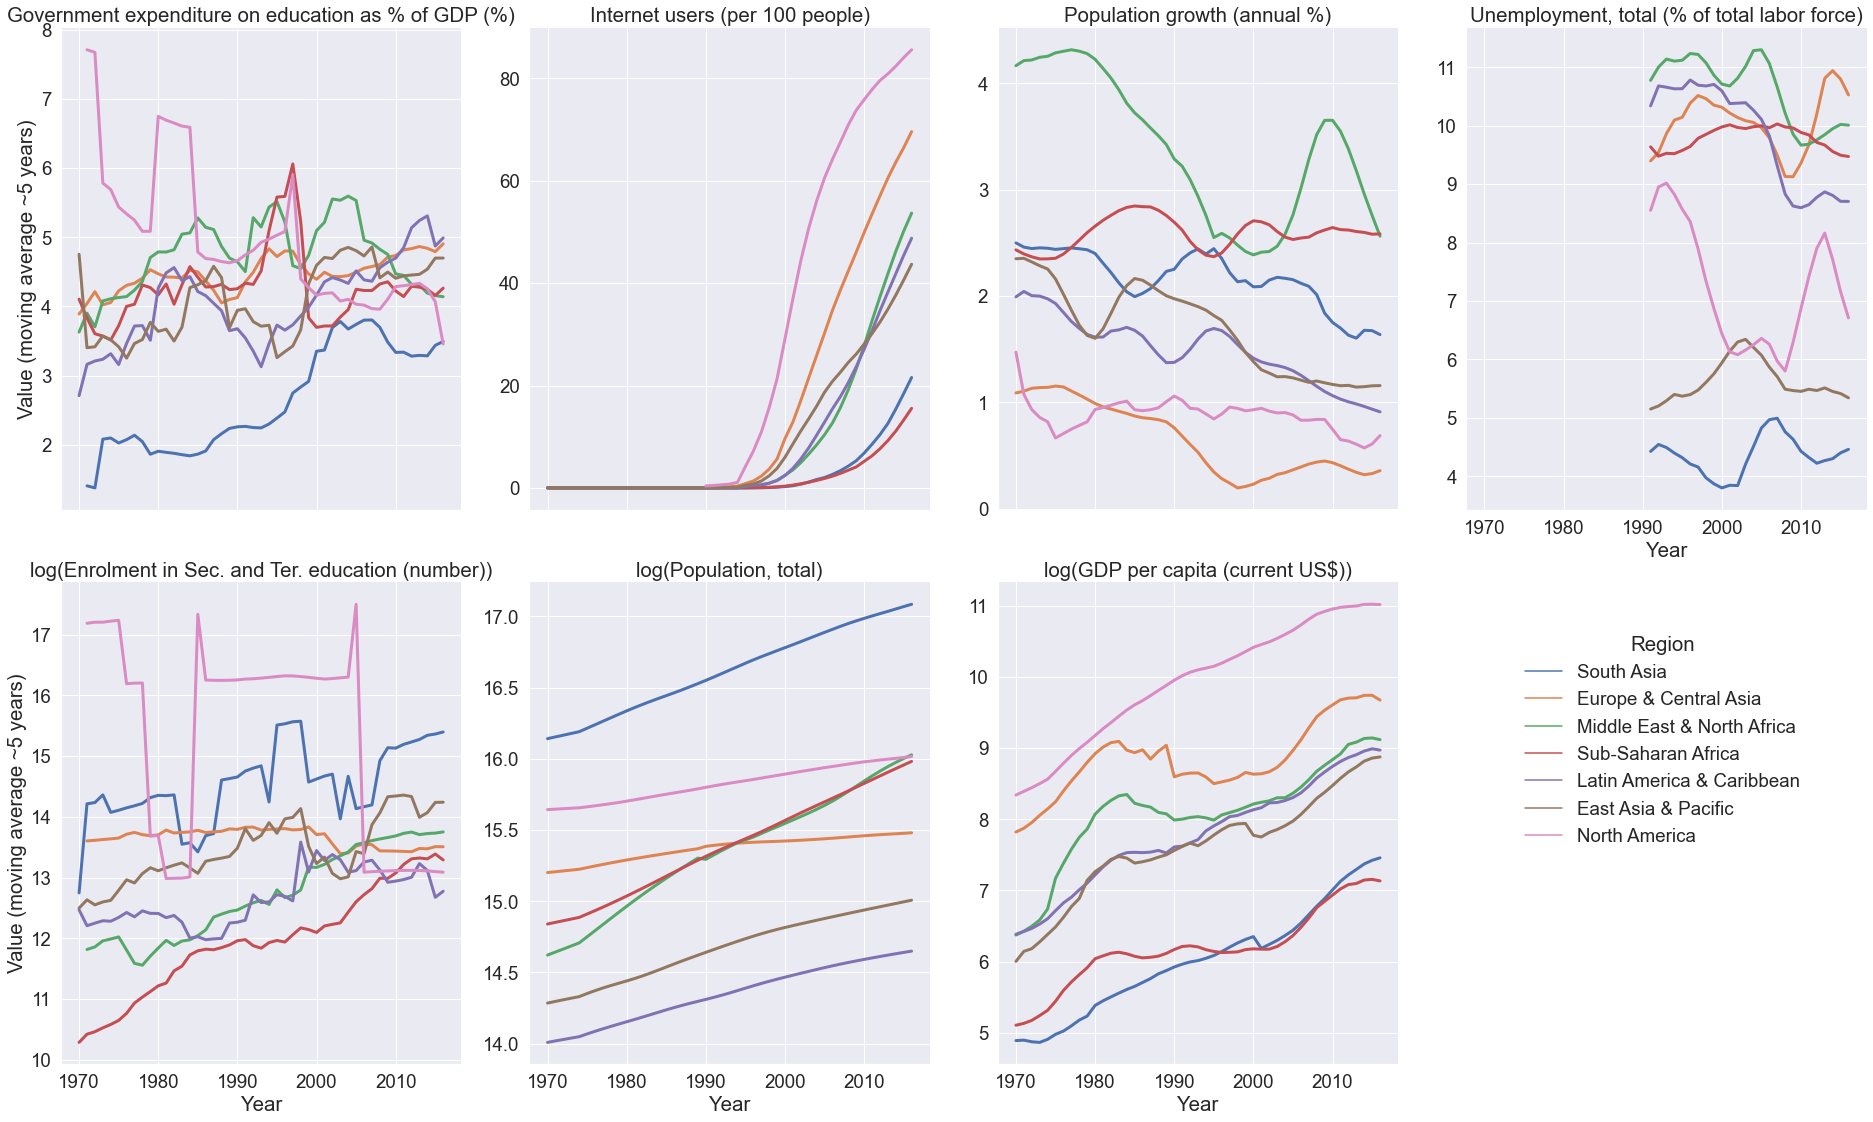

In [65]:


sns.set(font_scale=1.7)


lm = sns.relplot(x='Year_Int', y='Value (moving average ~5 years)', col='Indicator Name', hue='Region', data=dataTempoRegionTidy, kind="line", facet_kws={'sharey': False, 'sharex': True},col_wrap=4,ci=None,lw=3,height=8, aspect=0.7)
fig = lm.fig
fig.axes[0].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[0])
fig.axes[1].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[1])
fig.axes[2].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[2])
fig.axes[3].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[3])
fig.axes[3].set_xlabel('Year')
fig.axes[4].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[4])
fig.axes[4].set_xlabel('Year')
fig.axes[5].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[5])
fig.axes[5].set_xlabel('Year')
fig.axes[6].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[6])
fig.axes[6].set_xlabel('Year')

sns.move_legend(lm, "upper left", bbox_to_anchor=(.80, .45))



plt.tight_layout()
plt.show()

### <a name="C15"> Evolution dans le temps des indicateurs : Pays d'intérêts</a>

In [66]:
# Selection des Pays d'intérêts dans le jeu de données des séries temporelles des régions  :
dataTempoCountryTidy=dataTempoRegionTidy[dataTempoRegionTidy['Country Name'].isin(list(Data_Selected_Countries["Country Name"]))]



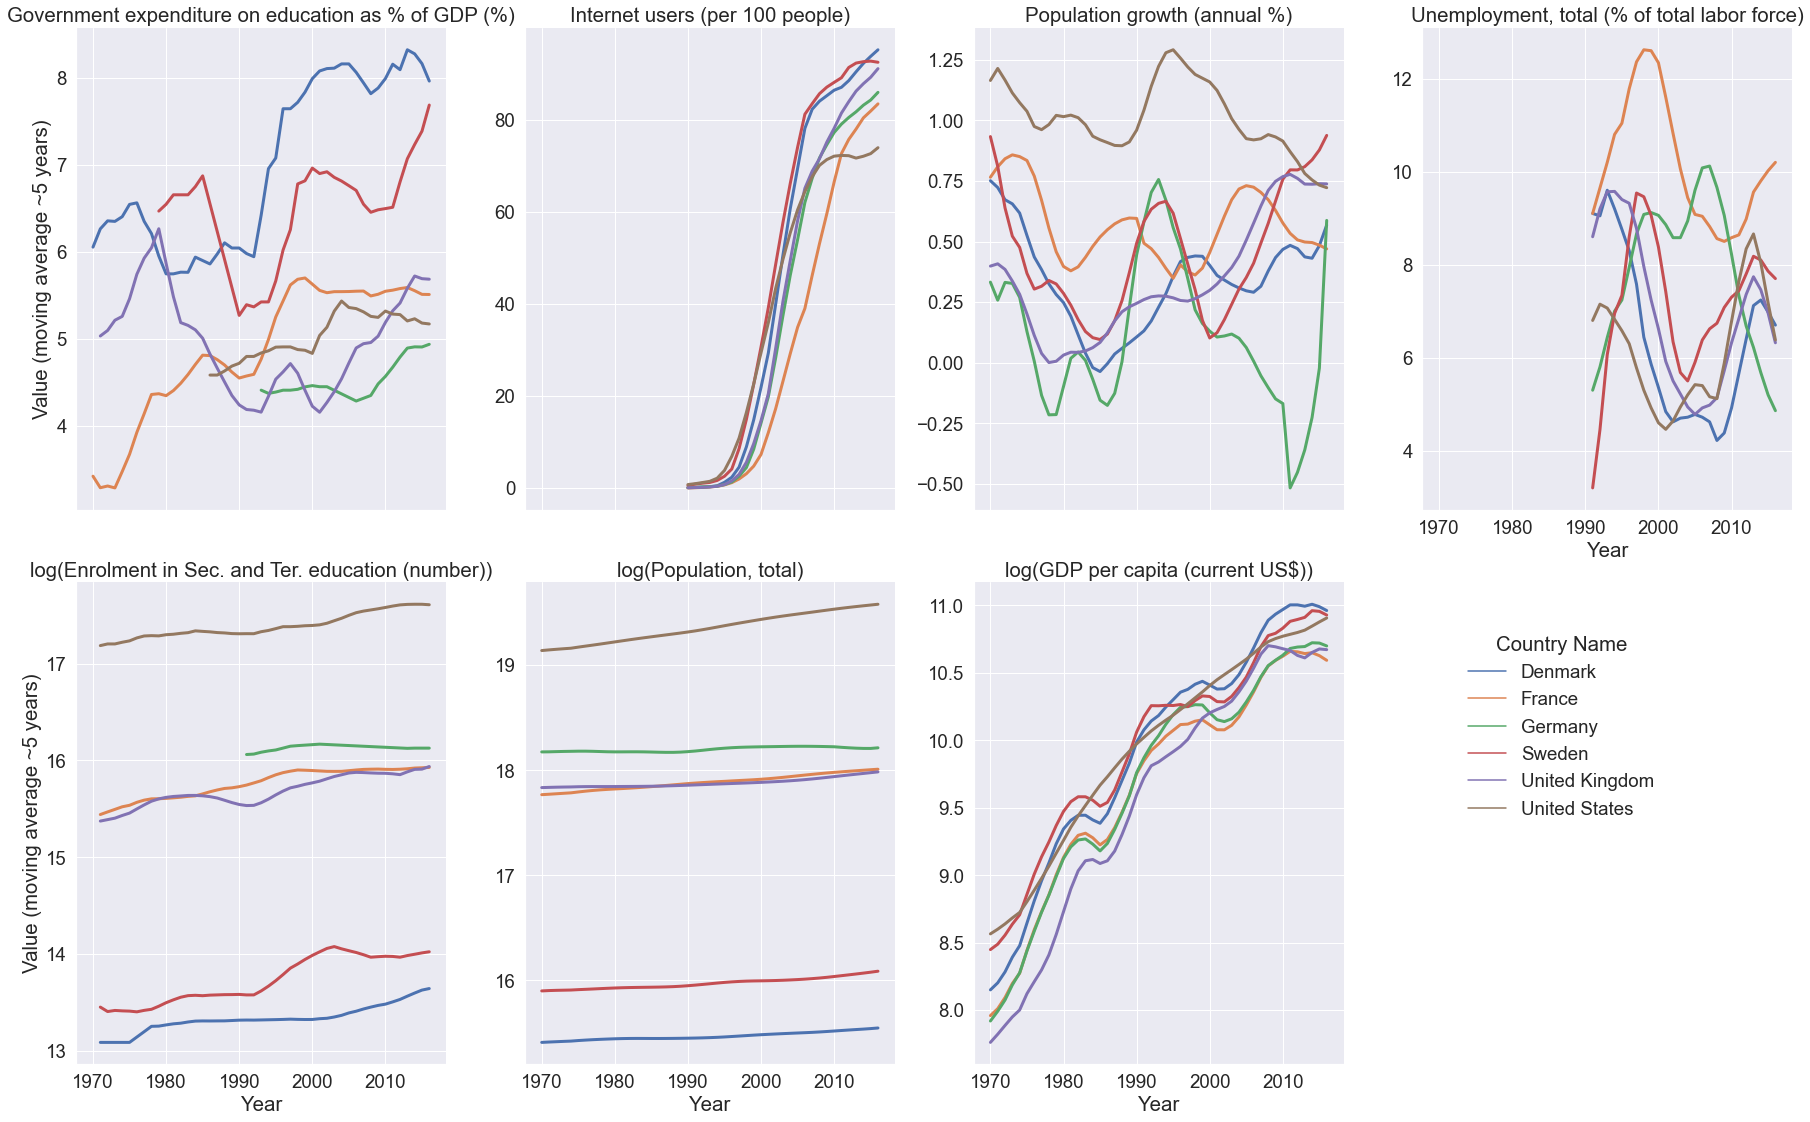

In [67]:


sns.set(font_scale=1.7)


lm = sns.relplot(x='Year_Int', y='Value (moving average ~5 years)', col='Indicator Name', hue='Country Name', data=dataTempoCountryTidy, kind="line", facet_kws={'sharey': False, 'sharex': True},col_wrap=4,ci=None,lw=3,height=8, aspect=0.7)
fig = lm.fig

fig.axes[0].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[0])
fig.axes[1].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[1])
fig.axes[2].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[2])
fig.axes[3].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[3])
fig.axes[3].set_xlabel('Year')
fig.axes[4].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[4])
fig.axes[4].set_xlabel('Year')
fig.axes[5].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[5])
fig.axes[5].set_xlabel('Year')
fig.axes[6].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[6])
fig.axes[6].set_xlabel('Year')
sns.move_legend(lm, "upper left", bbox_to_anchor=(.80, .45))


plt.tight_layout()
